# AB-тестирование
## Задание AB.5


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---

**Баллы за задание:**

* Задача 1 — 50 баллов
* Задача 2 — 30 баллов
* Задача 3 — 120 баллов


<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 3</font></b>
  * <b><font color="#f09000" size="3">Добавил решение</font></b>

*Примечание*
* <b><font color="#00b565">#00b565 &mdash; цвет для исправления замечаний</font></b>
* <b><font color="#f09000">#f09000 &mdash; цвет для решений с нуля</font></b>
* проверяющий может иначе классифицировать эти два типа дорешек

In [5]:
# Bot check

# HW_ID: ds_ab5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final  
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [6]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from statsmodels.stats.proportion import proportion_confint
from joblib import Parallel, delayed
sns.set(palette='Set2', style='whitegrid', font_scale=1.3)
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from statsmodels.stats.proportion import proportion_confint
from datetime import datetime
from datetime import timedelta
from random import randrange
sns.set(palette='Set2', style='whitegrid', font_scale=0.9)
import warnings
warnings.filterwarnings("ignore")

Приветик! Перед тобой очередное захватывающее домашнее задание по АБ-тестированию. Возьми чай или кофе, усаживайся поудобнее, настрой музыку в свой ритм, и поехали!

---

### Задача 1.

Начнем с очень простой задачки для разогрева. Напомним, для ratio-метрик мы хотим подобрать критерий, удовлетворяющий следующим свойствам:
1. Корректность &mdash; контролирование вероятности ошибки 1 рода;
2. Сонаправленность метрики критерия с исходной ratio-метрикой;
3. Возможность применения CUPED для повышения чувствительности.

Возьмем функцию генерации искусственных данных с занятия, в которой также генерируются предэкспериментальные данные. Будем рассматривать 1000 пользователей.

**1.** Проверь визуально, насколько выполняется сонаправленность для метода бакетов в зависимости от количества бакетов. Рассмотри случаи 10, 20, 30, 50 бакетов, и, может быть, несколько других.

*Ты же понимаешь, что надо позапускать код с занятия для разных параметров? :)*

In [7]:
alpha, sample_size, n_iter, feature = 0.05, 1000, 1000, 'session_lengths'

def test_simulation(test, generate_sample_x, generate_sample_y):
    """
    Проведение одного теста на искусственных выборках. Аргументы:
    test -- статистический критерий
    generate_sample_x, generate_sample_y -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    alpha -- теоретический уровень значимости
    Возвращает: pvalue
    """
    x, y = generate_sample_x(sample_size=sample_size), generate_sample_y(sample_size=sample_size)  # Генерируем выборк
    return test(x, y)[1]  # Применяем критерий

def run_experiments(test, generate_sample_x, generate_sample_y=None, n_iter=10000, sample_size=1000, alpha=0.05, draw=True, show_pvals=True, n_jobs=4):
    """
    Проведение серии AA-тестов на искусственных выборках. Аргументы:
    test -- статистический критерий
    generate_sample_x, generate_sample_y -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    alpha -- теоретический уровень значимости
    draw -- рисовать ли график
    show_pvals -- показывать ли распределение p-value
    Возвращает:
    type_1_prob_est -- оценка вероятности ошибки первого рода
    left_bound, right_bound -- границы доверительного интервала
    """
    if generate_sample_y is None:
        generate_sample_y = generate_sample_x
    pvals = Parallel(n_jobs=n_jobs)(delayed(test_simulation)(test, generate_sample_x, generate_sample_y)
     for _ in tqdm(range(n_iter), leave=False))  # Производим итерации
    n_rejects = (np.array(pvals) < alpha).sum()
    type_1_prob_est, left_bound, right_bound = estimate_reject_prob(n_rejects, n_iter)  # Оценка вероятности ошибки 1 рода
    if draw:  # Визуализация
        figsize = (14, 3) if show_pvals else (5, 2)
        visualization(type_1_prob_est, left_bound, right_bound, show_pvals, pvals, alpha, figsize)
    return type_1_prob_est, (left_bound, right_bound)

def visualization(prob_reject, left_bound, right_bound, show_pvals=False, pvals=None, alpha=0.05, figsize=(7, 2)):
    """
    Отрисовка интервала для вероятности отвержения критерия и гистограммы p-value (опционально)
    prob_reject -- оценка вероятности отвержения
    left_bound, right_bound -- границы доверительного интервала
    alpha -- теоретический уровень значимости
    show_pvals -- показывать ли распределение p-value
    pvals -- массив из p-value
    figsize -- размер фигуры matplotlib
    """
    if show_pvals:  # построение гистограммы p-value (опционально)
        with sns.axes_style("whitegrid"):
            plt.figure(figsize=figsize)
            plt.subplot(1, 2, 1)
            plt.hist(pvals, bins=np.linspace(0, 1, 21), alpha=0.7, weights=np.ones(len(pvals)) / len(pvals))
            plt.title("Распределение p-value")
    with sns.axes_style("whitegrid"):  # отрисовка интервала для вероятности отвержения критерия
        if show_pvals:
            plt.subplot(1, 2, 2)
        else:
            plt.figure(figsize=figsize)
        plt.hlines(0, 0, 1, color="black", lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color="red", lw=5, linestyle="--", alpha=0.6)
        plt.fill_between([left_bound, right_bound], [0.15]*2, [-0.15]*2, color="green", alpha=0.6)
        plt.scatter(prob_reject, 0, s=300, marker="*", color="red")
        plt.xlim((min(alpha, left_bound) - 1e-3, max(alpha, right_bound) + 1e-3))
        plt.title( f"Доля отвержений = {100*prob_reject:.2f}%, интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)")
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()

def estimate_reject_prob(n_rejects, n_iter):
    """
    Оценка вероятности отвержения критерия и ее дов. интервала. Используется для оценки вероятности ошибки первого рода и мощности. Аргументы:
    n_rejects -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов
    Возвращает:
    prob_reject -- оценка вероятности отвержения критерия
    left_bound, right_bound -- границы соотв. дов. интервала
    """
    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(n_rejects, n_iter, method="wilson")
    return prob_reject, left_bound, right_bound

def draw_power(powers, left_powers, right_powers, effects_list=np.linspace(0, 0.1, 11), label=None, title="Графики мощности", new_figure=False):
    """
    Построение и отрисовка графика мощности критерия. Аргументы:
    powers -- оценка мощности
    left_powers, right_powers -- границы соотв. дов. интервала
    effects -- сетка эффектов
    real_alpha -- оценка реальной мощности
    left_alpha, right_alpha -- границы соотв. дов. интервала
    title -- заголовок графика
    """
    if new_figure:
        plt.figure(figsize=(10, 4))
    plt.plot(effects_list, powers, label=label, lw=3)
    plt.fill_between(effects_list, left_powers, right_powers, alpha=0.3)
    if new_figure:
        plt.hlines(0.8, effects_list[0], effects_list[-1], color="black", alpha=0.5, label="Мощность 0.8 (пересечение — MDE)")
    plt.legend()
    plt.xlabel("Размер относительного эффекта")
    plt.ylabel("Мощность")
    plt.title(title)

def generate_session_sample(n_users=100, min_session_count=0, max_session_count=30, effect=0):
    """
    Генерация данных пользовательских сессий
    n_users -- количество пользователей
    min_session_count -- минимальное количество сессий на пользователя
    max_session_count -- максимальное количество сессий на пользователя
    effect -- добавляемый эффект
    """
    user_parameters = np.random.uniform(size=n_users, low=1, high=20)  # Параметр формы гамма-распределения для каждого пользователя
    user_session_counts = np.random.randint(size=n_users, low=min_session_count, high=max_session_count + 1)  # Количество сессий каждого пользователя
    users, session_lengths = [], []
    for user_id in range(n_users):  # Для каждого пользователя генерируем все его сессии
        users += [f"id_{user_id}"] * user_session_counts[user_id]
        session_lengths += list(np.random.gamma(shape=user_parameters[user_id], size=user_session_counts[user_id]) * (1 + effect))
    return pd.DataFrame({"user_id": users, "session_lengths": np.array(session_lengths, dtype=float)}) # Заносим в табличку

def bucket_transform(df, numerator_name="session_lengths", user_name="user_id", denominator_name=None, num_buckets=10, periods=False):
    """
    Создает бакеты из данных.
    df -- таблица данных
    numerator_name -- имя колонки-числителя ratio-метрики
    user_name -- имя колонки с id пользователей
    denominator_name -- имя колонки-знаменателя ratio-метрики
    num_buckets -- число бакетов
    Возвращает сгруппированные данные
    """
    if denominator_name is None:
        denominator_name = "ratio_denominator"
        df[denominator_name] = 1
    df["bucket"] = df[user_name].apply(lambda x: np.abs(hash(x)) % num_buckets)
    if periods:
        groupped_df = df.groupby(by=["bucket", "period"])[[numerator_name, denominator_name]].sum()
    else:
        groupped_df = df.groupby(by="bucket")[[numerator_name, denominator_name]].sum()
    groupped_df["values"] = (groupped_df[numerator_name] / groupped_df[denominator_name])
    return groupped_df

def generate_transform(n_users=100, min_session_count=0, max_session_count=30, num_buckets=10, effect=0):
    """
    Функция, объединяющая генерацию данных и их бакет-преобразование.
    n_users -- количество пользователей
    min_session_count -- минимальное количество сессий на пользователя
    max_session_count -- максимальное количество сессий на пользователя
    num_buckets -- число бакетов
    effect -- добавляемый эффект
    """
    df = generate_session_sample(n_users=n_users, min_session_count=min_session_count, max_session_count=max_session_count, effect=effect)
    return bucket_transform(df, num_buckets=num_buckets)["values"]

def gen_cuped_bucket_transform(sample_size=100, num_buckets=10, effect=0):
    num_buckets = 10
    df = generate_session_sample_with_prepilot(n_users=sample_size, effect=effect)
    bt = bucket_transform(df, num_buckets=num_buckets, periods=True).reset_index()
    prepilot = bt[bt.period==0][['bucket','session_lengths']].set_index('bucket')
    dt = bt[bt.period==1][['bucket','session_lengths']].set_index('bucket')
    dt['prepilot'] = prepilot['session_lengths']
    dt.rename(columns={'session_lengths':'pilot'}, inplace=True)
    return dt

def ratio_metric(df, numerator_name, denominator_name=None):
    """
    Вычисляет ratio-метрику
    df -- таблица данных
    numerator_name -- имя колонки-числителя ratio-метрики
    denominator_name -- имя колонки-знаменателя ratio-метрики
    """
    if denominator_name is None:
        return df[numerator_name].mean()
    else:
        return df[numerator_name].sum() / df[denominator_name].sum()

def users_mean_metric(df, numerator_name, user_name="user_id", denominator_name=None):
    """
    Вычисляет метрики отдельно по пользователям
    df -- данные
    numerator_name -- имя колонки-числителя ratio-метрики
    user_name -- имя колонки с id пользователей
    denominator_name -- имя колонки-знаменателя ratio-метрики
    """
    groupped_df = df.groupby(user_name)
    if denominator_name is None:
        return groupped_df.mean()[numerator_name].mean()
    else:
        users_values = (groupped_df[numerator_name].sum() / groupped_df[denominator_name].sum())
        return users_values.mean()
    
def bucket_metric(df, numerator_name, user_name="user_id", denominator_name=None, num_buckets=10):
    """
    Вычисляет метрики отдельно по бакетам
    df -- данные
    numerator_name -- имя колонки-числителя ratio-метрики
    user_name -- имя колонки с id пользователей
    denominator_name -- имя колонки-знаменателя ratio-метрики
    """
    bucket_df = bucket_transform(df, numerator_name, user_name=user_name, denominator_name=denominator_name, num_buckets=num_buckets)
    return bucket_df["values"].mean()

def metric_sampler(generate_sample, metrics, target_name, n_iter=10000, sample_size=1000):
    """
    Генерация значений разности средних по группам для разных метрик. Аргументы:
    generate_sample -- функции для семплирования выборок
    metrics -- список метрик
    target_name -- поле для вычисления метрики
    n_iter -- количество итераций
    sample_size -- размер выборок
    """
    values_absolute, values_relative = np.zeros((len(metrics), n_iter)), np.zeros((len(metrics), n_iter))
    for i in tqdm(range(n_iter)):  # Проведение экспериментов
        x, y = generate_sample(sample_size), generate_sample(sample_size)
        for j, metric in enumerate(metrics):
            test = metric(x, target_name)
            control = metric(y, target_name)
            values_absolute[j, i] = test - control
            values_relative[j, i] = (test - control) / control
    return values_absolute, values_relative

def generate_session_sample_with_prepilot(n_users=100, mean_session_count=15, effect=0):
    """
    Генерация данных пользовательских сессий для двух последовательных периодов.
    n_users -- кол-во пользователей
    mean_session_count -- среднее кол-во сессий на пользователя
    effect -- добавляемый эффект
    """
    user_parameters = np.random.uniform(size=n_users, low=1, high=20)  # Параметр формы гамма-распределения для каждого пользователя
    # Количество сессий каждого пользователя. Генерируем в два раза больше, чтобы хватило на два периода.
    user_session_counts = 2 + np.random.poisson(size=n_users, lam=2 * mean_session_count)
    users, period, session_lengths = [], [], []
    for user_id in range(n_users):  # Для каждого пользователя генерируем все его сессии
        users += [f"id_{user_id}"] * user_session_counts[user_id]
        session_lengths += list(np.random.gamma(shape=user_parameters[user_id], size=user_session_counts[user_id]) + effect)
        # В предположении, что все сессии равномерно распределены во времени, кол-во сессий в каждом периоде имеет бином. распр.-е с параметрами n=кол-во сессий и p=1/2.
        count = np.random.binomial(n=user_session_counts[user_id], p=0.5)
        count = min(max(1, count), user_session_counts[user_id] - 1)  # Исключаем случаи, когда в одном из периодов нет сессий
        period += [1] * count  # Определяем периоды
        period += [0] * (user_session_counts[user_id] - count)
    return pd.DataFrame({"user_id": users, "session_lengths": np.array(session_lengths, dtype=float), "period": np.array(period, dtype=int)})

def cuped_transform(x_df, y_df, sample_name="pilot", cuped_name="cuped", covariate_name="prepilot", paired=False, return_theta=False):
    """
    Выполняет CUPED-преобразование.
    :param x_df, y_df: данные по двум группам
    :param sample_name: имя столбца с целевым признаком
    :param cuped_name: имя столбца, в который записать преобразование
    :param covariate_name: имя столбца-ковариаты
    :param paired: являются ли выборки парными
    :param return_theta: возвращать ли значение theta
    :return: таблицы с добавленными столбцами и theta
    """
    if paired: # Случай парных выборок
        theta = (np.cov(x_df[covariate_name] - y_df[covariate_name], x_df[sample_name] - y_df[sample_name])[0, 1]) / ((x_df[covariate_name] - y_df[covariate_name]).var(ddof=0))
    else:  # Случай независимых выборок
        theta = (np.cov(x_df[covariate_name], x_df[sample_name])[0, 1] + np.cov(y_df[covariate_name], y_df[sample_name])[0, 1]) / (x_df[covariate_name].var(ddof=0) + y_df[covariate_name].var(ddof=0))
    x_df[cuped_name] = x_df[sample_name] - theta * x_df[covariate_name]  # Делаем преобразование
    y_df[cuped_name] = y_df[sample_name] - theta * y_df[covariate_name]
    if return_theta:
        return x_df, y_df, theta
    else:
        return x_df, y_df
    
def simple_ttest_var(var1, var2, cov):
    ''' Формула дисперсии абсолютного t-test '''
    return var1 + var2 - 2*cov

def relative_ttest_var(mean1, mean2, var1, var2, cov):
    ''' Формула дисперсии относительного t-test '''
    return var1 / mean2**2 + var2 * mean1**2 / mean2**4 - 2 * cov * mean1 / mean2**3

def cuped_ttest(x_df, y_df, relative=True, cuped=True, paired=False, sample_name='pilot', cuped_name='cuped', covariate_name='prepilot', alpha=0.05):
    '''
    Относительный t-test. Аргументы:
    x, y -- выборки одинакового размера
    alpha -- теор вероятность ошибки первого рода
    :param relative: использовать относительный тест или абсолютный
    :param cuped: применять ли cuped
    :param paired: являются ли выборки парными
    :param sample_name: имя столбца с целевым признаком
    :param cuped_name: имя столбца, в который записать преобразование
    :param covariate_name: имя столбца-ковариаты
    Возвращает:
    stat -- статистика критерия
    left_bound, right_bound -- границы дов. интервала
    pvalue
    '''
    assert len(x_df) == len(y_df)
    x_df, y_df = x_df.copy(), y_df.copy()
    x_df.index, y_df.index = range(len(x_df)), range(len(y_df))
    if cuped: # Сделаем cuped-преобразование
        x_df, y_df = cuped_transform(x_df, y_df, sample_name=sample_name, cuped_name=cuped_name, covariate_name=covariate_name, paired=paired)
    x_mean, y_mean = x_df.mean(), y_df.mean()  # Посчитаем все необходимые статистики
    x_mean_var, y_mean_var = x_df.var(ddof=0) / len(x_df), y_df.var(ddof=0) / len(y_df)
    xy_mean_var = (x_df - y_df).var(ddof=0) / len(y_df)
    name = cuped_name if cuped else sample_name  # Имя столбца, которое будем использовать
    if relative:  # Случай относительного теста
        stat = (x_mean[name] - y_mean[name])/y_mean[sample_name]
        var = relative_ttest_var(
            mean1=x_mean[name]-y_mean[name], mean2=y_mean[sample_name], var1=xy_mean_var[name], var2=y_mean_var[sample_name],
            cov=np.cov(x_df[name]-y_df[name], y_df[sample_name])[0, 1] / len(x_df)
        )
    else:  # Случай абсолютного теста
        stat = x_mean[name] - y_mean[name]
        var = simple_ttest_var(
            var1=x_mean_var[name], var2=y_mean_var[name],
            cov=np.cov(x_df[name], y_df[name])[0, 1] / len(x_df) if paired else 0
        )
    std = np.sqrt(var)  # По полученным значениям статистики и дисперсии применим стандартные характеристики нормального распределения
    z_stat = stat / std
    pvalue = 2*sps.norm.sf(np.abs(z_stat))
    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q*std
    right_bound = stat + q*std
    return stat, pvalue, left_bound, right_bound

100%|██████████| 1000/1000 [02:40<00:00,  6.21it/s]


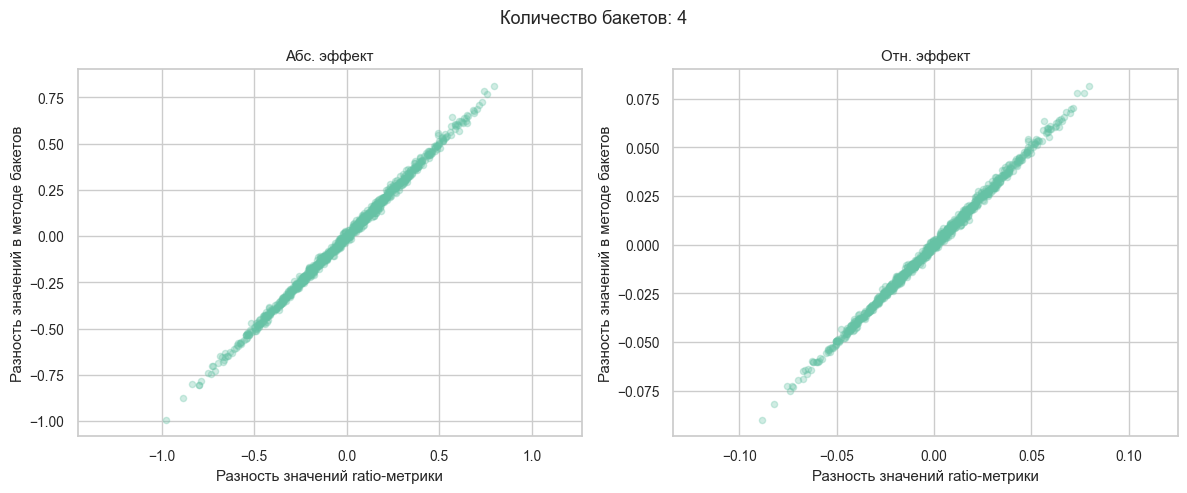

100%|██████████| 1000/1000 [02:41<00:00,  6.20it/s]


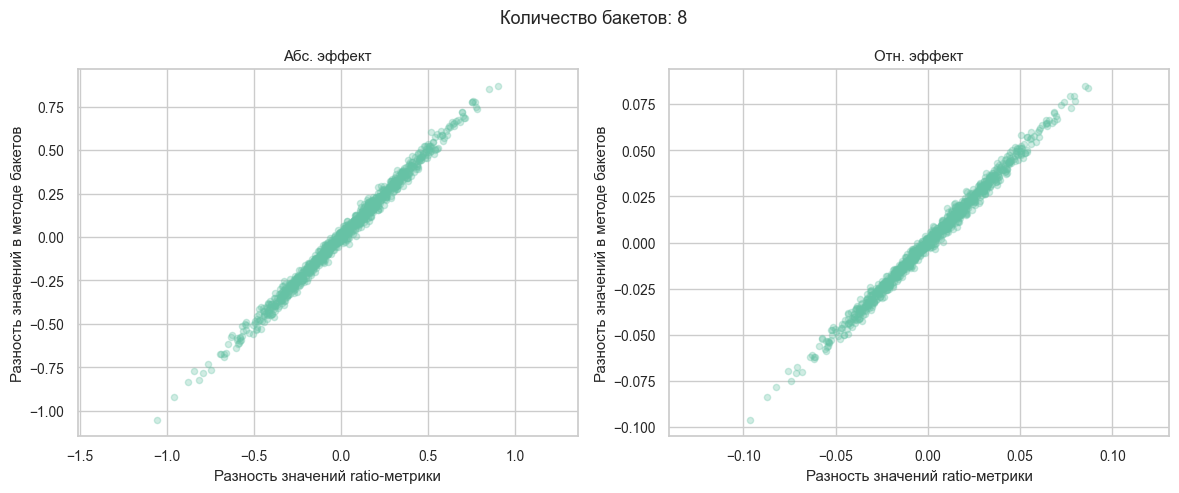

100%|██████████| 1000/1000 [02:39<00:00,  6.29it/s]


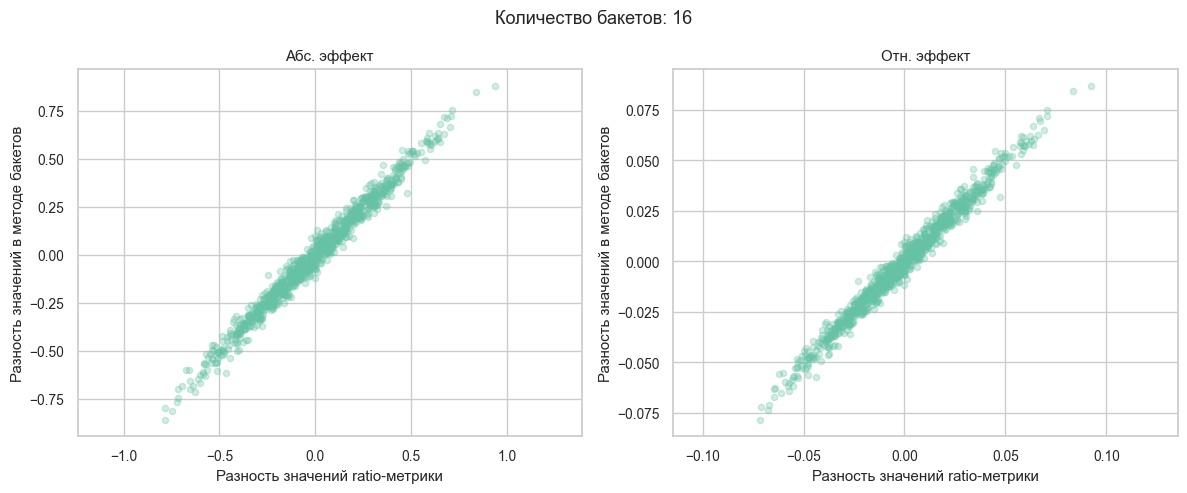

100%|██████████| 1000/1000 [02:41<00:00,  6.20it/s]


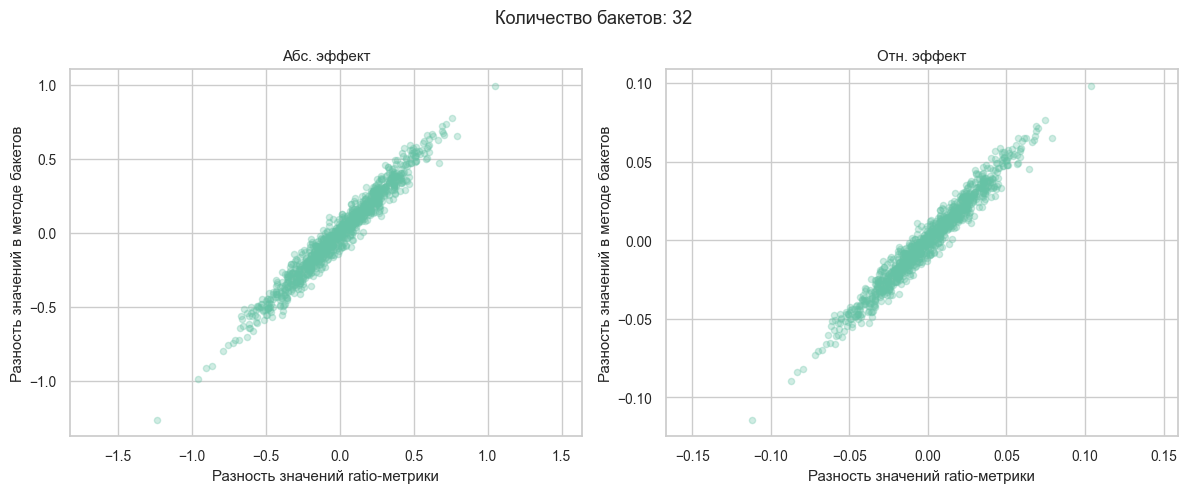

100%|██████████| 1000/1000 [02:41<00:00,  6.18it/s]


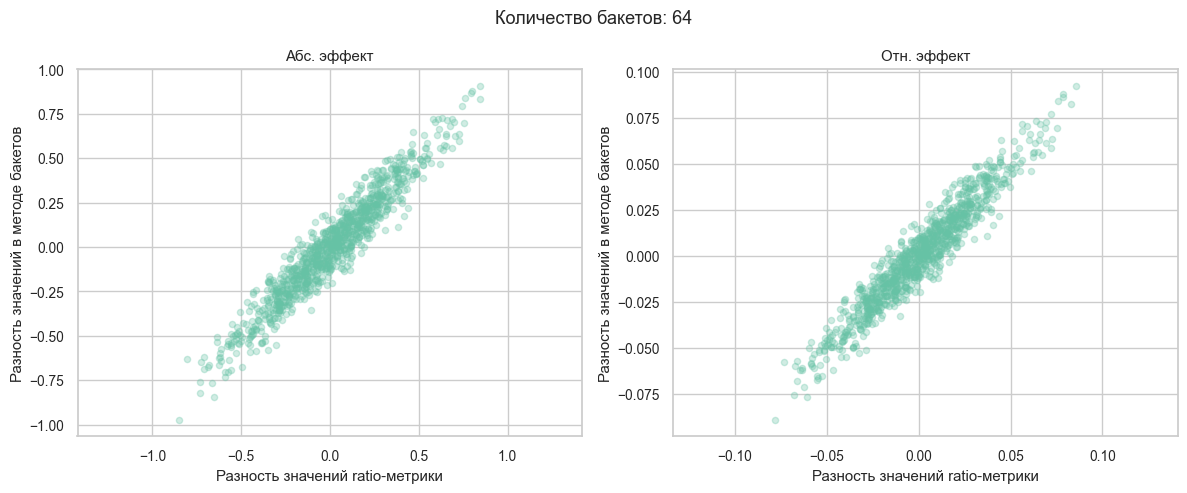

In [8]:
for num_buckets in [4,8,16,32,64]:
    values_absolute, values_relative = metric_sampler(
        generate_session_sample,
        metrics=[ratio_metric, lambda df, target_name: bucket_metric(df, target_name, num_buckets=num_buckets)],
        target_name='session_lengths', n_iter=n_iter, sample_size=sample_size)
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Количество бакетов: {num_buckets}')
    for i, (value, title) in enumerate(zip([values_absolute, values_relative], ['Абс.', 'Отн.'])):
        plt.subplot(1, 2, i+1)
        plt.scatter(value[0], value[1], s=20, alpha=0.3)
        plt.xlabel('Разность значений ratio-метрики')
        plt.ylabel('Разность значений в методе бакетов')
        plt.title(f'{title} эффект')
        plt.axis('equal')
    plt.tight_layout()
    plt.show()

В каком случае можно говорить о приближенной сонаправленности?

*С ростом числа бакетов растет дисперсия и всё больше точек заходят в 2 и 4 квадранты. Приближенно сонаправленность наблюдается при минимальной дисперсии, т.е. для 4-8 бакетов*

**2.** Давай все же попробуем сделать CUPED в методе бакетов, может нам зря рассказывали про линеаризацию...

Для начала внедрим CUPED в метод бакетов. Не забудь, что CUPED-преобразование необходимо применять непосредственно к бакетам, а не к исходным пользователям.

*Подсказка.* При определении бакетов удобно сделать группировку по двум полям сразу &mdash; по номеру бакета и по номеру периода. Далее надо будет смерджить горизонтально две части таблицы по периодам, то есть каждый бакет должен быть представлен только одной строкой, в которой будут данные за оба периода.

*сделал выше, с остальными методами*

Теперь провалидируем применение CUPED в методе бакетов на предмет контролирования ошибки 1 рода. Как и раньше, бери какую-нибудь функцию AA-теста с занятия.

*Не забудь, что итерации валидации можно легко параллелить, а ведь их надо сделать достаточно большое количество.*

Кол-во бакетов: 4


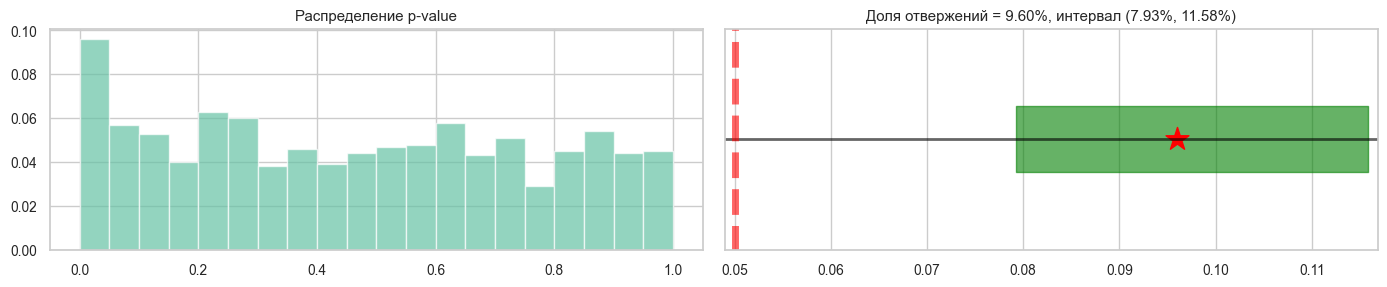

Кол-во бакетов: 8


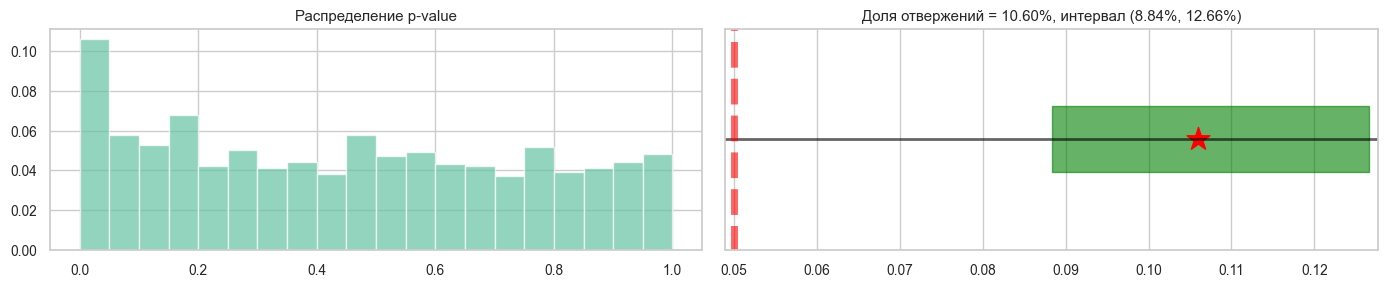

Кол-во бакетов: 16


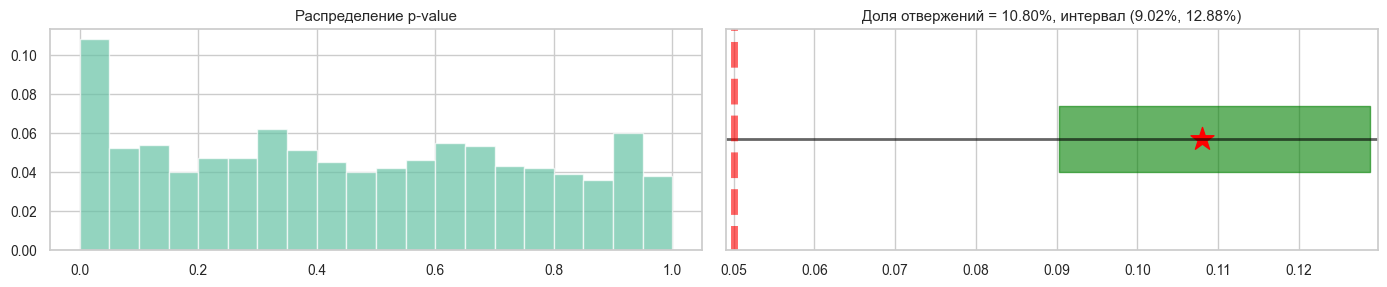

Кол-во бакетов: 32


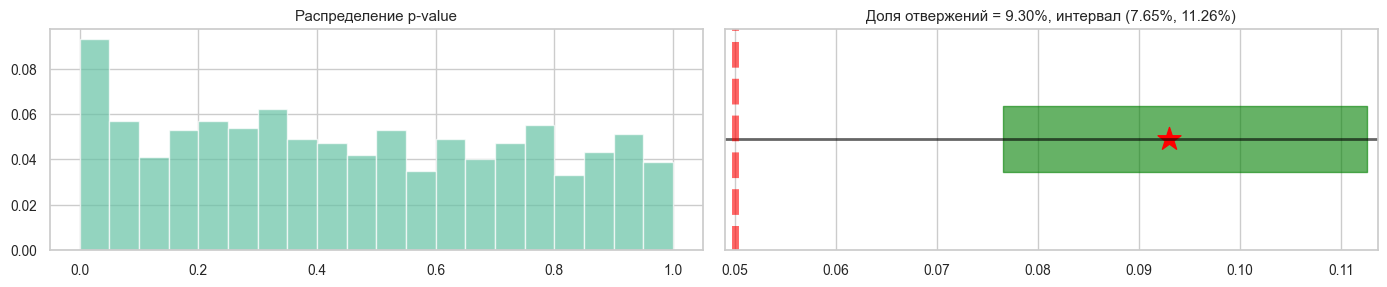

Кол-во бакетов: 64


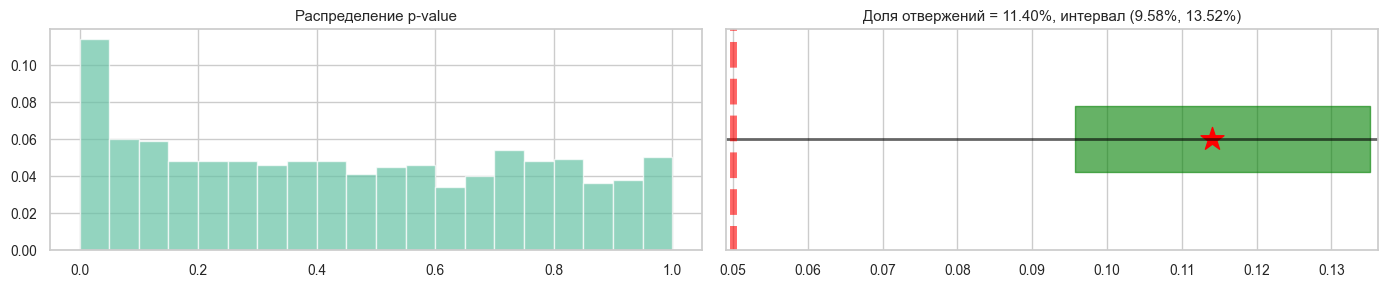

In [9]:
for num_buckets in [4,8,16,32,64]:
    print(f'Кол-во бакетов: {num_buckets}')
    run_experiments(cuped_ttest, gen_cuped_bucket_transform, generate_sample_y=None, n_iter=n_iter, sample_size=sample_size, draw=True, show_pvals=True, n_jobs=4)

Для какого количества бакетов выполнены одновременно первые два условия из перечисленных вначале задачи?

*Получилось ,что корректны все варианты, но сонаправленность (приближенно) есть только для 4-8*

**3.** Если такие случаи нашлись, оцени мощность соответствующих тестов для размеров эффекта от 1% до 5%. Сравни ее с CUPED в методе линеаризации.

*Хм, кажется, или здесь тоже только код позапускать?*

0it [00:00, ?it/s]

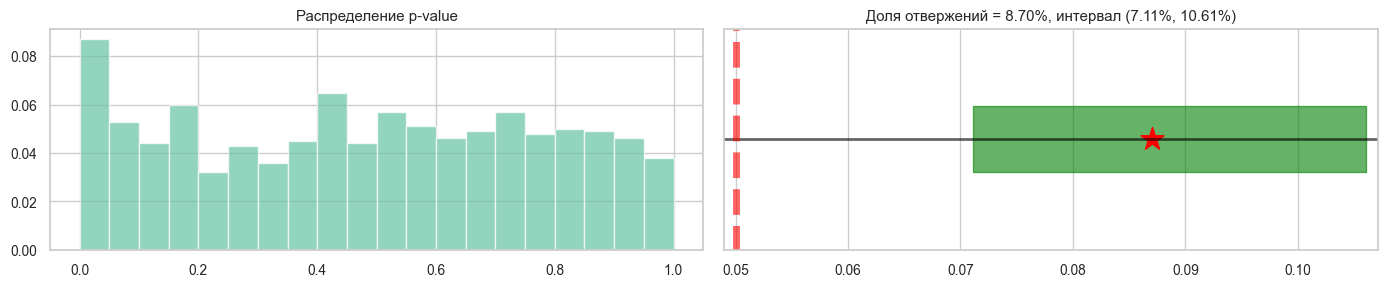

1it [03:17, 197.16s/it]

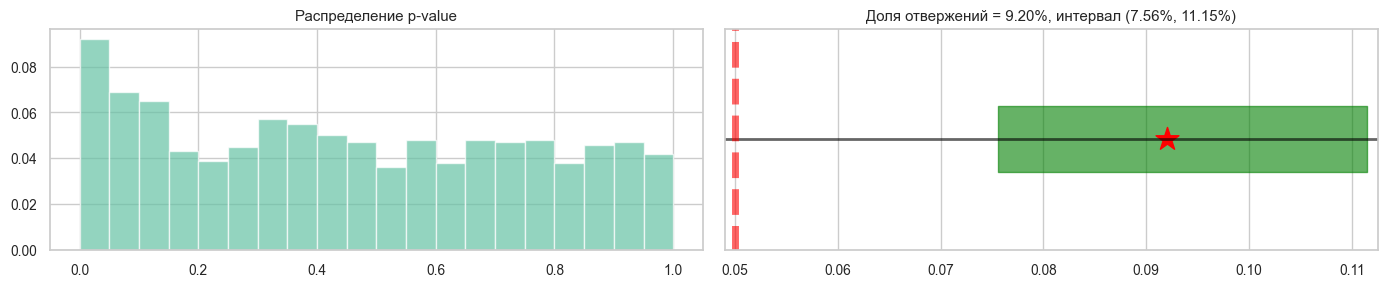

2it [06:15, 185.94s/it]

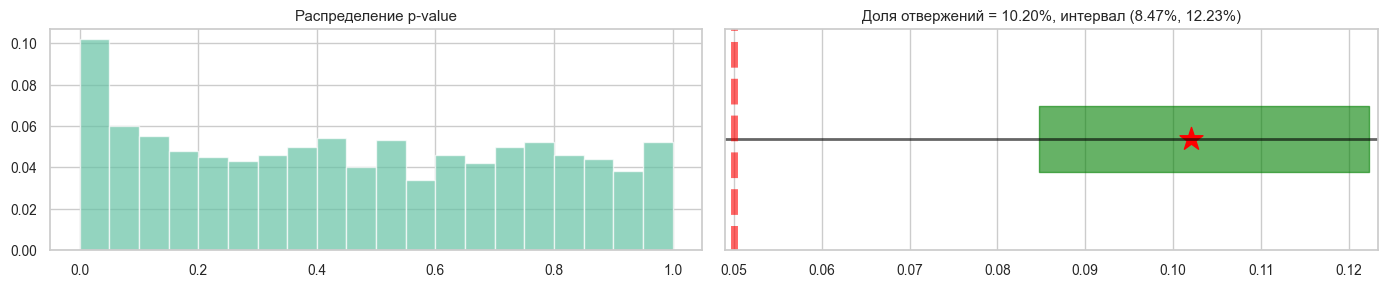

3it [09:14, 182.80s/it]

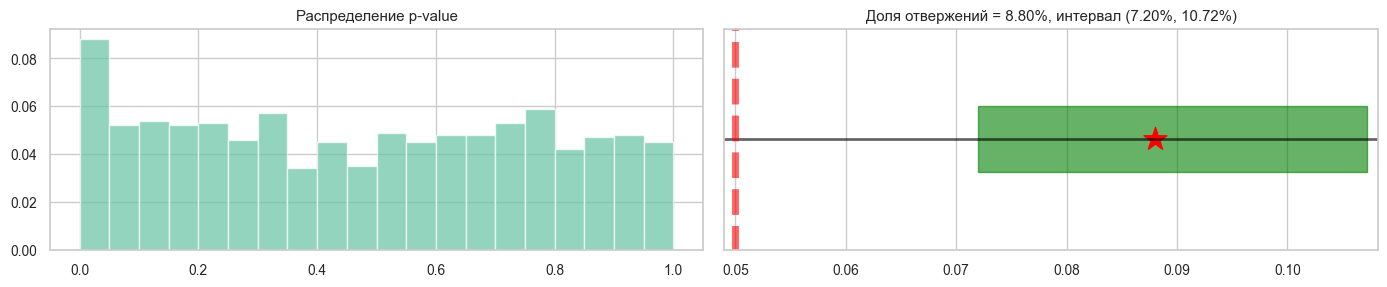

4it [12:07, 178.91s/it]

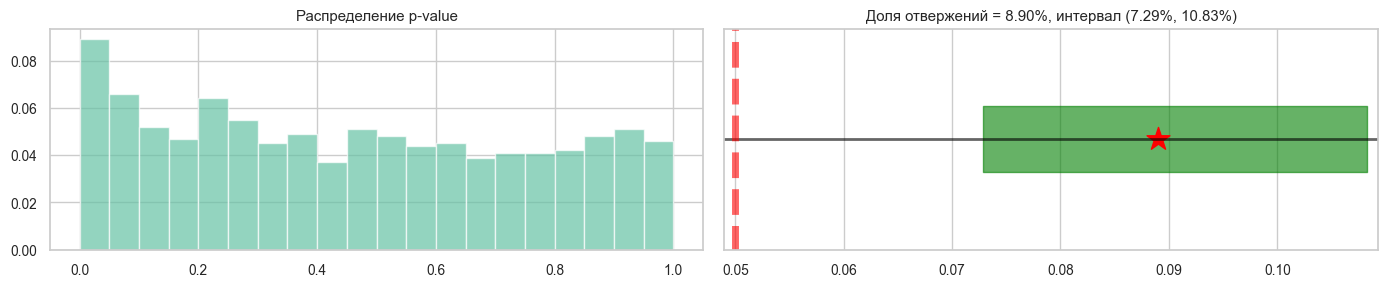

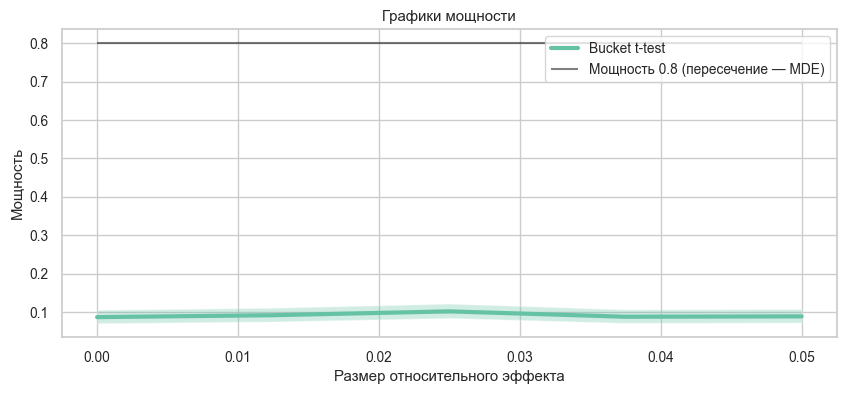

In [10]:
effects = np.linspace(0, 0.05, 5)
powers, left_bounds, right_bounds = np.zeros_like(effects),np.zeros_like(effects),np.zeros_like(effects)
# num_buckets = 4
for i, effect in tqdm(enumerate(effects), leave=False):
    powers[i], (left_bounds[i], right_bounds[i]) = run_experiments(cuped_ttest, gen_cuped_bucket_transform,
        generate_sample_y=lambda sample_size : gen_cuped_bucket_transform(sample_size=sample_size, effect=effect),
        n_iter=n_iter, sample_size=sample_size, draw=True, show_pvals=True, n_jobs=4)
draw_power(powers, left_bounds, right_bounds, label="Bucket t-test", new_figure=True, effects_list=effects)

**Выводы:** 
*Метод бакетов снижает сонаправленность с ростом числа бакетов и плохо работает с CUPED*

Вот и первая задачка закончилась! Правда же простая и интересная задачка?)

**Ответ:** +

---

### Задача 2.

Нам показалось, что задач очень мало, ведь тут столько всего интересного, хотя мы представили твою реакцию :)

Итак, вот еще одна задачка, но она *короткая и очень простая*, честно-честно. На лекции была получена связь между разницей линеаризованной метрики $\Delta L$ и исходной ratio-метрики $\Delta R$. Это соотношение позволяет в методе линеаризации получать доверительный интервал эффекта по исходной ratio-метрики так, как показано в ноутбуке с занятия. И на занятии мы даже проверили корректность такого подхода с точки зрения вероятности ошибки I рода и мощности.

Однако, давай проверим, насколько таким интервалом можно оценить истинный эффект. Для этого можно использовать следующие показатели качества:
* доля покрытия интервалом истинного значения параметра,
* средняя длина доверительного интервала.

Например, в первом случае нужно сравнить интервал не с нулем, как в ноутбуке, а с непосредственно истинным значением эффекта. Во втором случае &mdash; просто взять разность границ интервалов и усреднить.



Возьми с занятия код функции `run_experiments` и модифицируй ее так, чтобы после итераций оставались только границы доверительных интервалов. Далее посчитай указанные выше показатели качества. Это можно сделать внутри функции, а можно попросить ее вернуть список всех интервалов и все посчитать уже после.

Выполни это со следующими тестами:
* линеаризация,
* линеаризация + CUPED,
* дельта-метод.

*Ты же понимаешь, что по сути нужно выполнить ровно те же итерации, только брать не p-value, а доверительный интервал? Внутри функции даже всю визуализацию можно убрать.*

*Указания*:
* Учти, что в реализации теста через дельта-метод мы не фильтровали данные по периоду. Если ты берешь генерацию данных с периодами, не забудь сделать фильтрацию.
* Для интерпретации можно использовать как абсолютные, так и относительные эффекты при генерации данных. Однако, линеаризация не совместима с относительным тестом, потому как линеаризованная метрика может принимать разные знаки. Поэтому оценивать нужно только абсолютные эффекты. Если на генерации использовали относительные, не забудьте их перевести в абсолютные при сравнении интервалов.
* Сделай сравнение как для маленьких, так и для больших эффектов. Из теоремы с лекции мы помним, что для больших эффектов линеаризованная метрика может отклоняться от показателей исходной ratio-метрики.

In [11]:
def linearization(control_df, test_df, numerator_name='session_lengths', denominator_name=None, user_name="user_id", eta=0):
    """
    Реализация линеаризации ratio-метрики. Аргументы:
    control_df, test_df -- таблицы данных для двух групп, порядок важен
    numerator_name -- имя колонки-числителя ratio-метрики
    denominator_name -- имя колонки-знаменателя ratio-метрики
    user_name -- имя колонки с id пользователей
    eta -- параметр линеаризации
    Возвращает:
    control_users, test_users -- таблицу с поюзерными линеаризованными метриками,
    которые записаны в колонках linearization_values
    """
    if denominator_name is None:
        control_df, test_df = control_df.copy(), test_df.copy()
        denominator_name = "ratio_denominator"
        control_df[denominator_name], test_df[denominator_name] = 1, 1
    kappa = (1-eta)*ratio_metric(control_df, numerator_name, denominator_name) + eta*ratio_metric(test_df, numerator_name, denominator_name)  # Коэф-т линеаризации 
    control_users, test_users = control_df.groupby(user_name).sum(), test_df.groupby(user_name).sum()  # Группируем по пользователям   
    control_users["linearization_values"] = (control_users[numerator_name] - kappa*control_users[denominator_name]) # Вычисляем линеаризованные метрики
    test_users["linearization_values"] = (test_users[numerator_name] - kappa*test_users[denominator_name])
    return control_users, test_users

def test_simulation(test, generate_sample_control, generate_sample_test=None, feature_values="session_lengths", effect=0, relative_effect=False):
    """
    Проведение одного теста на искусственных выборках. Аргументы:
    test -- статистический критерий
    generate_sample_control, generate_sample_test -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    alpha -- теоретический уровень значимости
    Возвращает: доверительный интервал
    """
    control_df, test_df = generate_sample_control(size=sample_size), generate_sample_test(size=sample_size) # Генерируем выборки
    if relative_effect: # Добавляем эффект, если хотим оценить мощность
        test_df[feature_values] *= 1 + effect * (test_df["period"] == 1)
    else:
        test_df[feature_values] += effect * (test_df["period"] == 1)
    _, _, l, r = test(control_df, test_df)  # Применяем критерий
    return l, r

def calculate_strata_weights(df, name):
    '''
    Вычисляет веса страт.
    :param df: исходные данные
    :return: веса страт
    '''
    strata_weights = df.groupby(by='strata')[name].count()
    return strata_weights / strata_weights.sum()

def weighted_mean(df, weights, name):
    '''
    Вычисляет взвешенное среднее.
    :param df: данные
    :param weights: веса страт
    :return: взвешенное среднее
    '''
    strata_means = df.groupby(by='strata')[name].mean()
    return (strata_means * weights).sum()

def weighted_post_var(df, strata_weights, name):
    '''
    Вычисляет взвешенную дисперсию при постстратификации.
    :param df: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''
    strata_vars = df.groupby(by='strata')[name].var()
    weighted_var = (strata_vars * strata_weights).sum() / len(df)
    post_addition = (strata_vars * (1-strata_weights)).sum() / (len(df)**2)
    return weighted_var + post_addition

def stratified_ttest(x_df, y_df, strata_weights, name, alpha=0.05):
    '''
    Стратифицированный абсолютный t-test
    :param x_df: выборка вместе с информацией о стратах
    :param y_df: выборка вместе с информацией о стратах
    :param strata_weights: веса страт
    :param method: метод 'random', 'stratified', 'post_stratified'
    :param alpha: уровень значимости
    :return: статистика критерия, границы доверительного интервала, p-value
    '''
    mean_function, var_function = weighted_mean, weighted_post_var
    x_mean, y_mean = mean_function(x_df, strata_weights, name), mean_function(y_df, strata_weights, name)
    x_var, y_var = var_function(x_df, strata_weights, name), var_function(y_df, strata_weights, name)
    stat = x_mean - y_mean
    std = np.sqrt(x_var + y_var)
    t_stat = stat / std
    pvalue = 2*sps.norm.sf(np.abs(t_stat))
    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q*std
    right_bound = stat + q*std
    return stat, pvalue, left_bound, right_bound

def linearization_ratio_ttest(control_df, test_df, cuped=False, stratified=False, numerator_name="session_lengths", denominator_name=None, user_name="user_id", eta=0, alpha=0.05):
    """
    Реализация t-test для ratio-метрик с использованием линеаризации и CUPED. В качестве ковариаты используется значение линеаризованной метрики на предпериоде. Аргументы:
    control_df, test_df -- таблицы данных для двух групп, порядок важен
    cuped -- применять ли CUPED-преобразование
    numerator_name -- имя колонки-числителя ratio-метрики
    denominator_name -- имя колонки-знаменателя ratio-метрики
    user_name -- имя колонки с id пользователей
    eta -- параметр линеаризации
    alpha -- уровень значимости
    Возвращает:
    stat -- статистика критерия
    pvalue -- соответствующее p-value
    left_bound, right_bound -- границы доверительного интервала
    """
    denom = "ratio_denominator" if denominator_name is None else denominator_name
    name = "linearization_values_cuped" if cuped else "linearization_values"
    control_strata = control_df.groupby(user_name).strata.mean().astype('int') if stratified else None
    test_strata = test_df.groupby(user_name).strata.mean().astype('int') if stratified else None
    control_users_pilot, test_users_pilot = linearization(  # Линеаризация на экспериментальном периоде
        control_df[control_df["period"] == 1], test_df[test_df["period"] == 1],
        numerator_name=numerator_name, denominator_name=denominator_name, user_name=user_name, eta=eta,
    )
    if cuped:
        control_users_prepilot, test_users_prepilot = linearization(  # Линеаризация на предэкспериментальном периоде
            control_df[control_df["period"] == 0], test_df[test_df["period"] == 0],
            numerator_name=numerator_name, denominator_name=denominator_name, user_name=user_name, eta=eta,
        )
        control_users_pilot = control_users_pilot.join(control_users_prepilot, lsuffix="", rsuffix="_prepilot")  # Соединяем две таблицы данных для каждой из групп
        test_users_pilot = test_users_pilot.join(test_users_prepilot, lsuffix="", rsuffix="_prepilot")
        control_df, test_df = cuped_transform(  # Сделаем cuped-преобразование
            control_users_pilot, test_users_pilot,
            sample_name="linearization_values", cuped_name=name, covariate_name="linearization_values_prepilot",
        )
    else:  # Если не делаем CUPED, то используем сами линеаризованные данные
        control_df, test_df = control_users_pilot, test_users_pilot
    if stratified:
        control_df['strata'], test_df['strata'] = control_strata, test_strata
        strata_weights = calculate_strata_weights(control_df, name)
        stat, pvalue, left_bound, right_bound = stratified_ttest(test_df[[name, 'strata']], control_df[[name, 'strata']], strata_weights, name)
    else:
        res = sps.ttest_ind(test_df[name], control_df[name])
        stat, pvalue = res.statistic, res.pvalue
        left_bound, right_bound = res.confidence_interval()
    # Применяем t-test для линеаризованной метрики. по теореме с занятия дов. интервал исходной метрики пропорционален линеаризованной метрике
    coef = eta * control_df[denom].mean() + (1 - eta) * test_df[denom].mean()
    left_bound, right_bound = left_bound / coef, right_bound / coef
    return stat, pvalue, left_bound, right_bound

def run_experiments_int(test, generate_sample_x, generate_sample_y=None, n_iter=10000, sample_size=1000, alpha=0.05, show_pvals=True, n_jobs=4, effect=0):  # интервалы
    """
    Проведение серии AA-тестов на искусственных выборках. Аргументы:
    test -- статистический критерий
    generate_sample_x, generate_sample_y -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    alpha -- теоретический уровень значимости
    draw -- рисовать ли график
    show_pvals -- показывать ли распределение p-value
    Возвращает:
    type_1_prob_est -- оценка вероятности ошибки первого рода
    left_bound, right_bound -- границы доверительного интервала
    """
    if generate_sample_y is None:
        generate_sample_y = generate_sample_x
    intervals = Parallel(n_jobs=n_jobs)(delayed(test_simulation)(test, generate_sample_x, generate_sample_y) for _ in tqdm(range(n_iter), leave=False))  # Производим итерации
    left, right = zip(*intervals)
    n_covered = np.where((np.array(left) > effect) | (np.array(right) < effect), 0, 1).sum()
    interval_length = (np.array(right) - np.array(left)).mean()
    covered_prob_est, left_bound, right_bound = estimate_reject_prob(n_covered, n_iter)
    return covered_prob_est, (left_bound, right_bound), interval_length

def relative_var(mean1, mean2, var1, var2, cov):
    """Формула дисперсии относительного t-test"""
    return (var1 / mean2**2 + var2 * mean1**2 / mean2**4 - 2 * cov * mean1 / mean2**3)

def ratio_var(df, numerator_name, denominator_name, user_name):
    '''
    Оценка асимптотической дисперсии ratio-метрики.
    df -- данные
    numerator_name -- имя колонки-числителя ratio-метрики
    denominator_name -- имя колонки-знаменателя ratio-метрики
    user_name -- имя колонки с id пользователей
    '''
    user_sums = df.groupby(user_name).sum()
    mean1, mean2 = user_sums.mean().loc[[numerator_name, denominator_name]]
    var1, var2 = user_sums.var().loc[[numerator_name, denominator_name]] / len(user_sums)
    cov = user_sums.cov().loc[numerator_name, denominator_name] / len(user_sums)
    return relative_var(mean1, mean2, var1, var2, cov)

def delta_ratio_ttest(x_df, y_df, numerator_name='session_lengths', denominator_name=None, user_name='user_id', alpha=0.05):
    '''
    Реализаця t-test для ratio-метрики через ее асимптотическую дисперсию, полученную с помощью дельта-метода. Аргументы:
    x_df, y_df -- выборки одинакового размера
    numerator_name -- имя колонки-числителя ratio-метрики
    denominator_name -- имя колонки-знаменателя ratio-метрики
    user_name -- имя колонки с id пользователей
    alpha -- уровень значимости
    Возвращает:
    stat -- статистика критерия
    left_bound, right_bound -- границы дов. интервала
    pvalue
    '''
    x_df, y_df = x_df[x_df.period == 1], y_df[y_df.period == 1]
    if denominator_name is None:
        denominator_name = 'ratio_denominator'
        x_df[denominator_name], y_df[denominator_name] = 1, 1
    x_mean, y_mean = ratio_metric(x_df, numerator_name, denominator_name), ratio_metric(y_df, numerator_name, denominator_name)  # Оценка мат. ожиданий ratio-метрик
    x_var, y_var = ratio_var(x_df, numerator_name, denominator_name, user_name=user_name), ratio_var(y_df, numerator_name, denominator_name, user_name=user_name)  # Оценка дисперсий ratio-метрик
    stat = x_mean - y_mean  # Далее формируем обычный t-test
    var = x_var + y_var
    std = np.sqrt(var)
    z_stat = stat / std
    pvalue = 2*sps.norm.sf(np.abs(z_stat))
    q = sps.norm.ppf(1 - alpha/2)
    left_bound, right_bound = stat - q*std, stat + q*std
    return stat, pvalue, left_bound, right_bound

Теперь просто визуализируй полученные значения, сравни интервалы и сделай выводы.

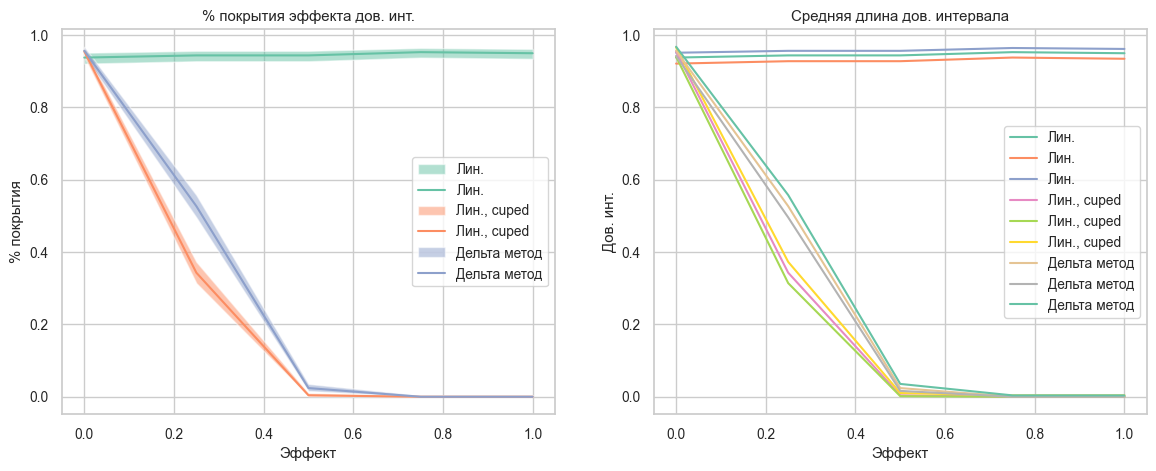

In [12]:
effects = np.linspace(0,1,5)
history = {k:[] for k in ['coverage_lin','coverage_lin_cuped','coverage_delta','length_lin','length_lin_cuped','length_delta']}

def run_test_and_store(test_fn, effect, key):
    coverage, (lcov, rcov), length = run_experiments_int(
        generate_sample_x=lambda size: generate_session_sample_with_prepilot(size),
        generate_sample_y=lambda size: generate_session_sample_with_prepilot(size, effect=effect),
        sample_size=sample_size, n_iter=n_iter, show_pvals=False, effect=effect, test=test_fn)
    history[f'coverage_{key}'].append((coverage, lcov, rcov))
    history[f'length_{key}'].append(length)

for effect in effects:
    run_test_and_store(test_fn=lambda x, y: linearization_ratio_ttest(x, y, cuped=False, eta=0.5), effect=effect, key='lin')
    run_test_and_store(test_fn=lambda x, y: linearization_ratio_ttest(x, y, cuped=True, eta=0.5), effect=effect, key='lin_cuped')
    run_test_and_store(test_fn=delta_ratio_ttest, effect=effect, key='delta')

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
for k,label in zip(['coverage_lin','coverage_lin_cuped','coverage_delta'],['Лин.','Лин., cuped','Дельта метод']):
    plt.fill_between(effects, *list(zip(*history[k]))[-2:], alpha=0.5, label=label)
    plt.plot(effects, list(zip(*history[k]))[0], label=label)
plt.legend()
plt.xlabel('Эффект')
plt.ylabel('% покрытия')
plt.title('% покрытия эффекта дов. инт.')
plt.subplot(1, 2, 2)
for k,label in zip(['coverage_lin','coverage_lin_cuped','coverage_delta'],['Лин.','Лин., cuped','Дельта метод']):
    plt.plot(effects, history[k], label=label)
plt.legend()
plt.xlabel('Эффект')
plt.ylabel('Дов. инт.')
plt.title('Средняя длина дов. интервала')
plt.show()

*Лин.: доля покрытия всегда около 95%. Лин.,cuped и дельта: доля покрытия падает и даже зануляется для эффекта >0.5. Графики средней длины дов.интервала аналогичны*

Правда простая задача?)

---

### Задача 3.

Отлично, впереди все самое интересное &mdash; реальные данные! Вспомни, ранее мы делали дизайн АБ-теста на сайте Физтех.Статистики, причем в качестве метрики использовали среднюю по посетителям глубину просмотра страниц. Однако, на практике заказчики чаще интересуются глубиной просмотра страниц в среднем по всем посетителям сразу. Эту метрику мы и рассмотрим в данной задаче.

Поясни, почему она является ratio-метриками, и укажи, что в числителе, а что в знаменателе.

Аналогично рассмотри метрику длительности веб-сессий по всему сайту.

<b><font color="#f09000" size="5">Добавил решение</font></b>

<b><font color="#f09000" size="3">Замечание:</font></b> <i>Задача 3: Исследование ratio-метрик на данных сайта Физтех.Статистики.
▫️ Пункт 1: наличие решения. Инд. комм. нет задачи
Баллы: 0.0 / 120.0</i>

$R = \frac{\sum \limits_{ij} t_{ij}}{N}$, где $t_{ij}$ - длина\глубина сессии $j$ у пользователя $i$, N - кол-во сессий

**1.** Хм, а если это ratio-метрики, правильно ли мы с ними работали? Давай проверим сонаправленность на реальных данных. Проверку нужно выполнить аналогично AA-тесту, совершая следующие итерации.
1. Выбрать случайный интервал времени фиксированной длины в истории визитов.
2. Выбрать две случайные группы фиксированного размера.
3. Посчитать по ним ratio-метрику и исследуемую метрику.

*Правда ведь просто? Ну разве что выбор момента времени и группы надо дописать.*

Проведи эту проверку для длительности и глубины (можно в одном цикле) для следующих подходов:
- агрегация данных по пользователям,
- метод бакетов,
- линеаризация.

Все эти способы рассматривались на занятии, так что это еще один повод туда заглянуть. Напомним, ratio-метрика считается как общее отношение, без агрегации по пользователям.

Выполни всю эту процедуру для двух разных размеров групп и двух разных длин интервалов. Например, 10% и 20% пользователей, а так же 3 и 5 недель.

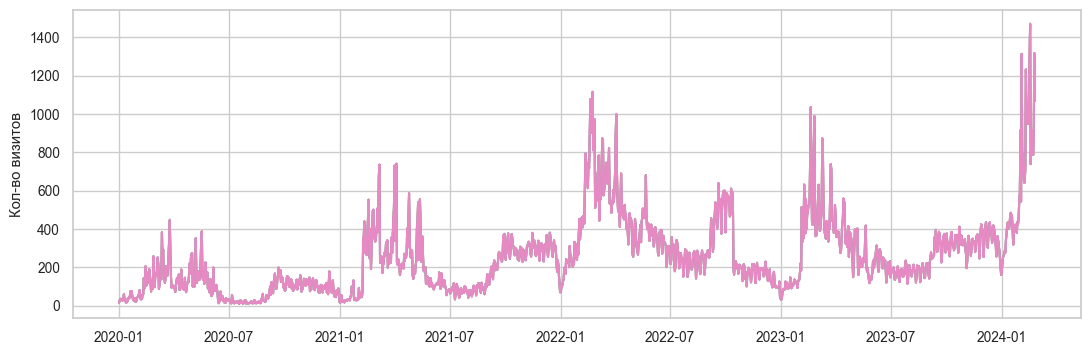

In [ ]:
START = '2022-03-01'
END = '2022-09-01'
n_iter = 10000
num_buckets = 35

df = pd.read_csv('miptstats_metrica.tsv', sep='\t')
df['ym:s:dateTimeUTC'] = pd.to_datetime(df['ym:s:dateTimeUTC'])
df['date'] = pd.to_datetime(df['ym:s:dateTimeUTC'].dt.date)
df['ym:s:browser'] = df['ym:s:browser'].fillna('unknown')
df = df[['ym:s:clientID', 'ym:s:pageViews', 'ym:s:visitDuration', 'date', 'ym:s:browser']]

plt.figure(figsize=(13,4))
plt.plot(df.groupby("date").count())
plt.ylabel('Кол-во визитов')
plt.show()

In [16]:
def random_date(start, end):
    '''Выбирает случайную дату между start, end'''
    start = datetime.strptime(start, '%Y-%m-%d')
    end = datetime.strptime(end, '%Y-%m-%d')
    delta = end - start
    int_delta = delta.days
    random_day = randrange(int_delta)
    return pd.Timestamp((start + timedelta(days=random_day)).date())


def random_sampler(df, proportion):
    '''Генерирует 2 выборки размера proportion * num_unique_users из df случайно'''
    sample_size = int(len(df["ym:s:clientID"].unique()) * proportion)
    chosen = df.sample(n=2 * sample_size)
    return chosen.iloc[:sample_size], chosen.iloc[sample_size:]


def ratio_metric(df, numerator_name):
    '''Вычисляет ratio-метрику из df с колонкой-числителем numerator_name'''
    numerator_vector = df.groupby("ym:s:clientID").sum()[numerator_name]
    denominator_vector = df.groupby("ym:s:clientID").count()["date"]
    return numerator_vector.sum() / denominator_vector.sum()


def users_mean_metric(df, numerator_name, denominator_name=None):
    '''Вычисляет метрику с аггрегацией по пользователям
    из df с колонкой-числителем numerator_name'''

    groupped_df = df.groupby("ym:s:clientID")
    users_values = groupped_df.sum()[numerator_name] / groupped_df.count()["date"]
    return users_values.mean()


def bucket_transform(df, numerator_name, num_buckets):
    '''Выполняет подсчет ratio-метрики с бакет-преобразованием с df, 
    столбцом-числителем numerator_name, кол-во бакетов равно num_buckets'''

    denominator_name = 'ratio_denominator'
    df[denominator_name] = 1

    df['bucket'] = df["ym:s:clientID"].apply(lambda x: np.abs(hash(x)) % num_buckets)
    groupped_df = df.groupby(by='bucket')[[numerator_name, denominator_name]].sum()
    groupped_df['values'] = groupped_df[numerator_name] / groupped_df[denominator_name]
    return groupped_df


def bucket_metric(df, numerator_name, num_buckets):
    '''Вычисляет ratio-метрику по бакетам'''
    bucket_df = bucket_transform(
        df, numerator_name, num_buckets=num_buckets
    )
    return bucket_df['values'].mean()


def linearization(x_df, y_df, numerator_name, eta=0):
    '''
    Реализация линеаризации ratio-метрики.
    
    Аргументы:
    x_df, y_df -- таблицы данных для двух групп
    numerator_name -- имя колонки-числителя ratio-метрики
    eta -- параметр линеаризации
    
    Возвращает:
    x_users, y_users -- таблицу с поюзерными линеаризованными метриками,
    которые записаны в колонках linearization_values
    '''
    
    x_df = x_df.copy()
    y_df = y_df.copy()
    
    denominator_name = 'ratio_denominator'
    x_df[denominator_name] = 1
    y_df[denominator_name] = 1
        
    kappa = (1-eta) * ratio_metric(x_df, numerator_name) \
        + eta * ratio_metric(y_df, numerator_name)
    
    x_users = x_df.groupby("ym:s:clientID").sum()
    y_users = y_df.groupby("ym:s:clientID").sum()
    
    x_users['linearization_values'] = x_users[numerator_name] \
        - kappa * x_users[denominator_name]
    y_users['linearization_values'] = y_users[numerator_name] \
        - kappa * y_users[denominator_name]
    
    return x_users, y_users


def linearization_metric(df, numerator_name):
    return df['linearization_values'].mean()

def metric_sampler(df, interval_length, n_iter, sample_size, num_buckets, proportion):
    '''Генерация значений разности средних по группам для разных метрик. 
    interval_length -- длина временного интервала для семплирования из df
    n_iter -- количество итераций
    sample_size -- размер выборок
    num_buckets -- кол-во бакетов
    
    returns: values_absolute, values_relative, shape: (2, 4, n_iter)'''

    values_absolute = np.zeros((2, 4, n_iter))
    values_relative = np.zeros((2, 4, n_iter))

    # Проведение экспериментов
    for i in tqdm(range(n_iter)):
        # Генерируем выборки
        start = random_date(START, END)
        interval = df[(df["date"]>=start) & (df["date"]<start+timedelta(days=interval_length))]
        x, y = random_sampler(interval, proportion)
        
        # Считаем ratio-метрику и исследуемую метрику
        for j, target_name in enumerate(["ym:s:pageViews", "ym:s:visitDuration"]):
            for k, metric in enumerate([ratio_metric, users_mean_metric]):
                test = metric(x, target_name)
                control = metric(y, target_name)
                values_absolute[j, k, i] = test - control
                values_relative[j, k, i] = (test - control) / control

            # bucket metric
            test = bucket_metric(x, target_name, num_buckets)
            control = bucket_metric(y, target_name, num_buckets)
            values_absolute[j, 2, i] = test - control
            values_relative[j, 2, i] = (test - control) / control

            # linearization metric
            xl, yl = linearization(x, y, numerator_name=target_name, eta=0)
            test = linearization_metric(xl, target_name)
            control = linearization_metric(yl, target_name)
            values_absolute[j, 3, i] = test - control
            values_relative[j, 3, i] = (test - control) / control

    return values_absolute, values_relative


def plot_values(values_absolute, values_relative):
    '''строит графики для оценки сонаправленности'''
    for alternative_id, ylabel in zip([1, 2, 3],
                                    ["в агрегации данных по пользователям", "в методе бакетов", "в линеаризации"]):
        plt.figure(figsize=(18, 5))
        for j, (target, c) in enumerate(zip(["\n(глубина сессии)", "\n(длительность сессии)"],
                                        ["mediumpurple", "lightcoral"])):
            for i, value, title in zip(
                [1, 2],
                [values_absolute, values_relative],
                ['Абсолютный эффект', 'Относительный эффект']
            ):
                plt.subplot(1, 4, 2*j+i)
                plt.scatter(value[j, 0], value[j, alternative_id], s=20, alpha=0.3, color=c)
                plt.xlabel('Разность значений ratio-метрики')
                plt.ylabel('Разность значений\n'+ylabel)
                plt.title(title+target)
                plt.axis('equal')
        
        plt.tight_layout()

*3 недели, 10% юзеров*

In [17]:
ten_percent = 0.1

100%|██████████| 10000/10000 [11:52<00:00, 14.04it/s]


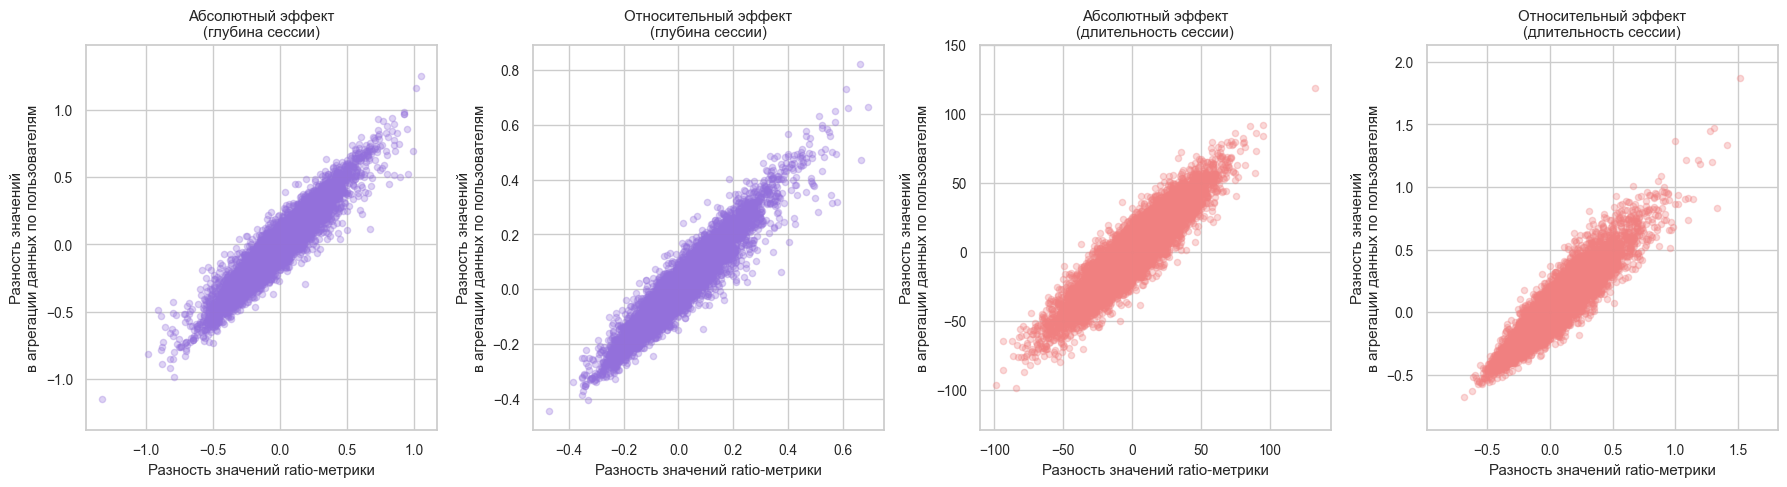

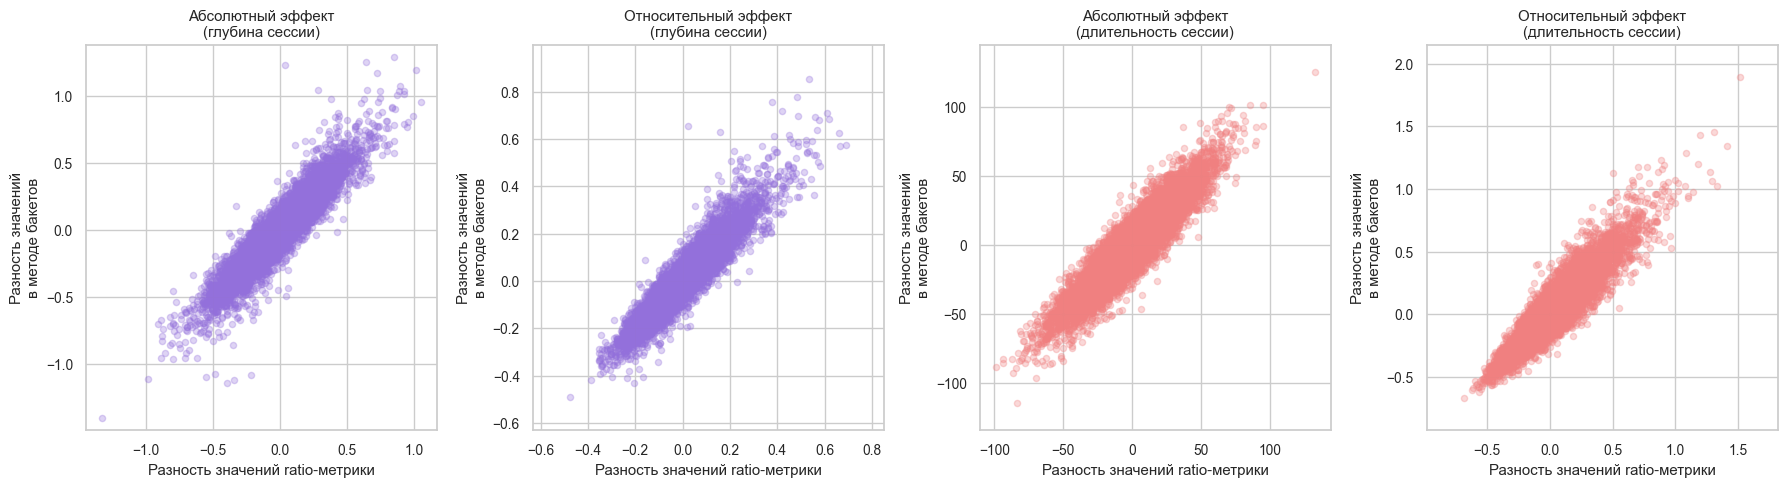

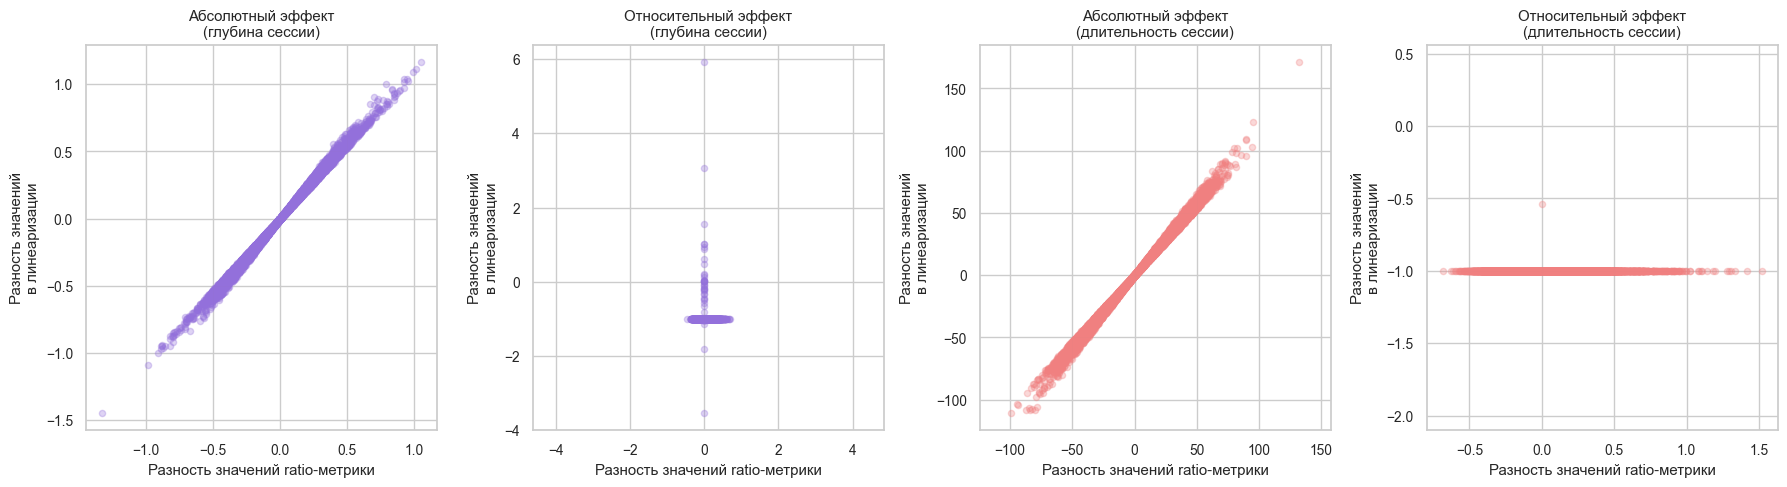

In [18]:
interval_length = 7*3
values_absolute, values_relative = metric_sampler(
    df,
    interval_length,
    n_iter,
    ten_percent,
    num_buckets,
    proportion=0.1
)

plot_values(values_absolute, values_relative)

*в обоих методах метрики и ratio-метрики разнонаправленны. В случае линеаризации стало лучше – метрики сонаправл.*

*3 недели, 20% юзеров*

100%|██████████| 10000/10000 [10:26<00:00, 15.96it/s]


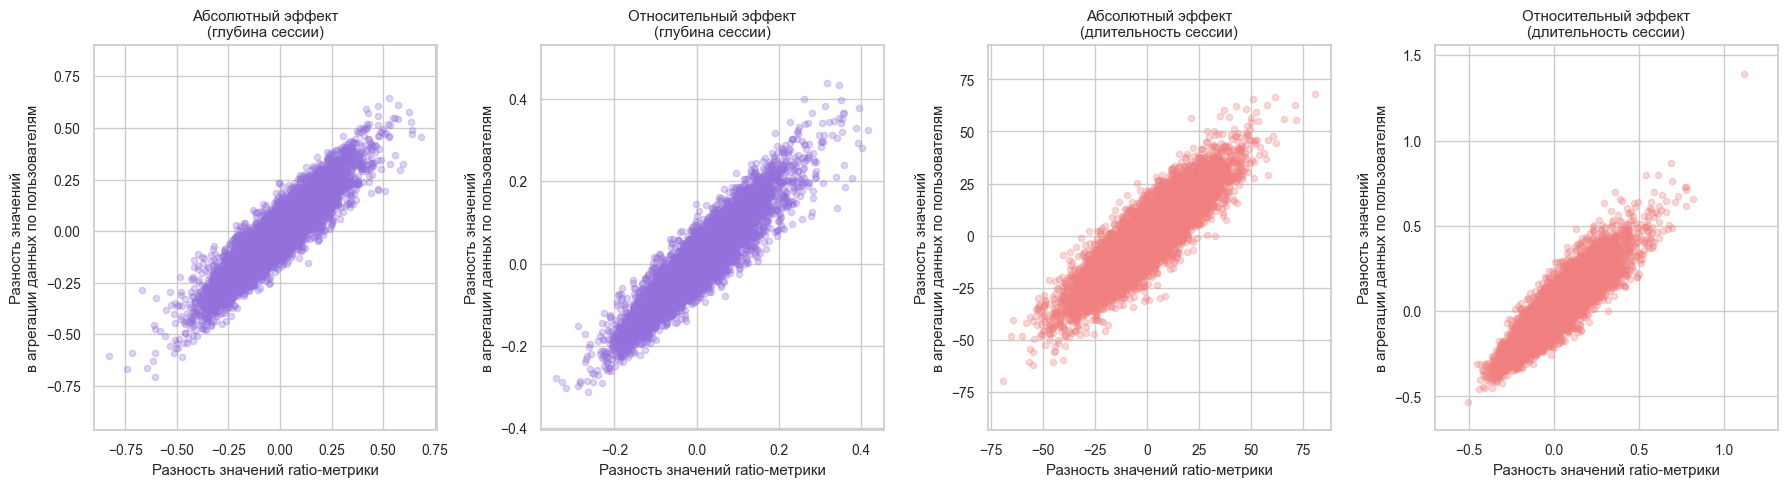

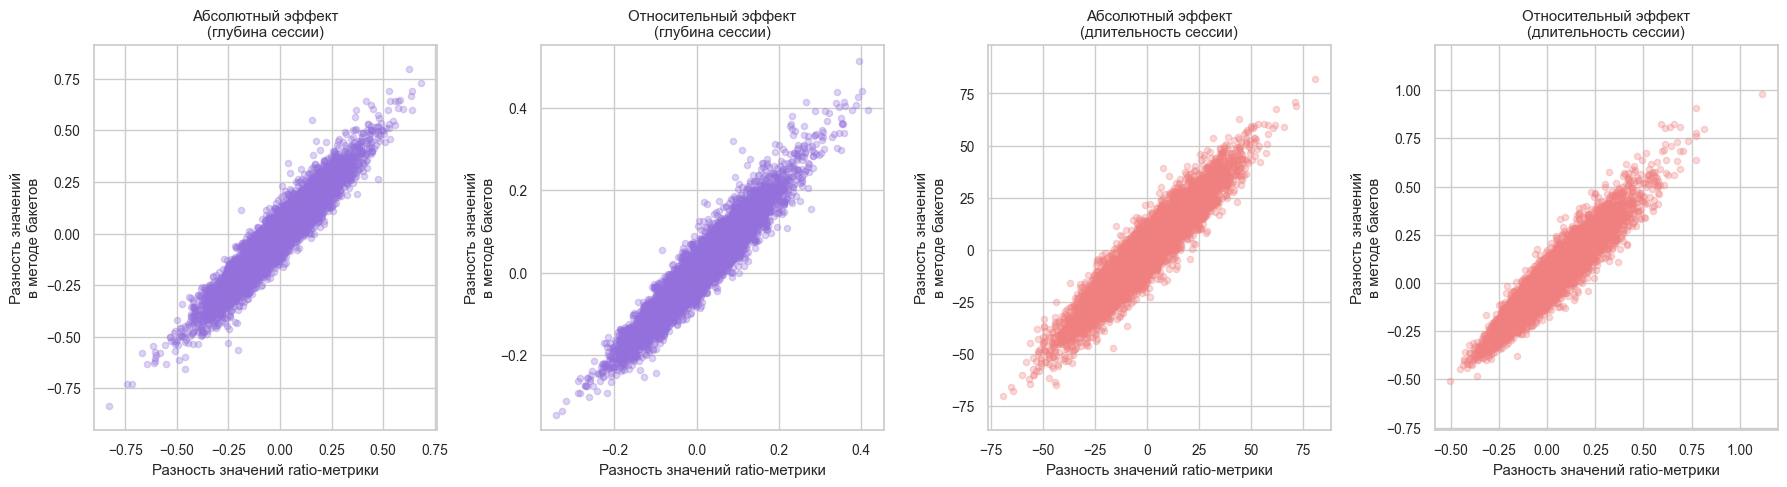

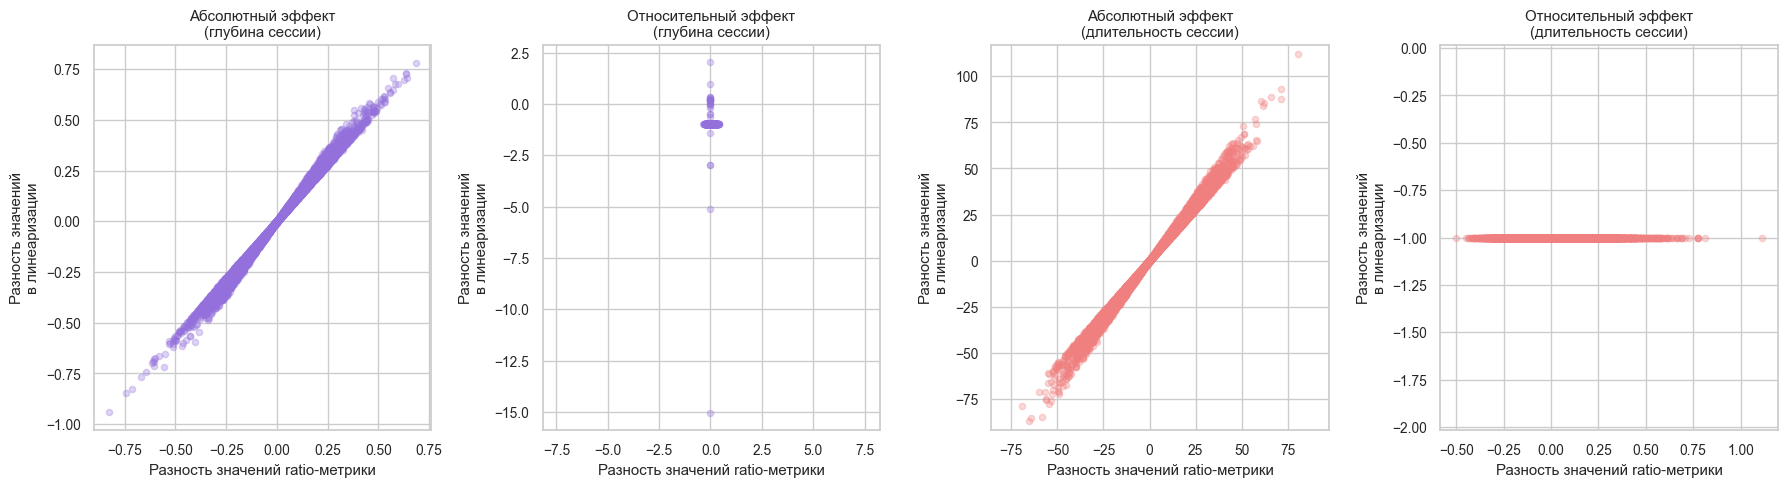

In [19]:
interval_length = 7*3
values_absolute, values_relative = metric_sampler(
    df,
    interval_length,
    n_iter,
    ten_percent,
    num_buckets,
    proportion=0.2
)

plot_values(values_absolute, values_relative)

*Метод бакетов обогнал агрегацию по юзерам. Хотя абс. эффект линеаризации немного изменился, разброс вблизи нуля остался очень маленьким, поэтому метрики по-прежнему сонаправл.*

*5 недель, 10% юзеров*

100%|██████████| 10000/10000 [09:19<00:00, 17.87it/s]


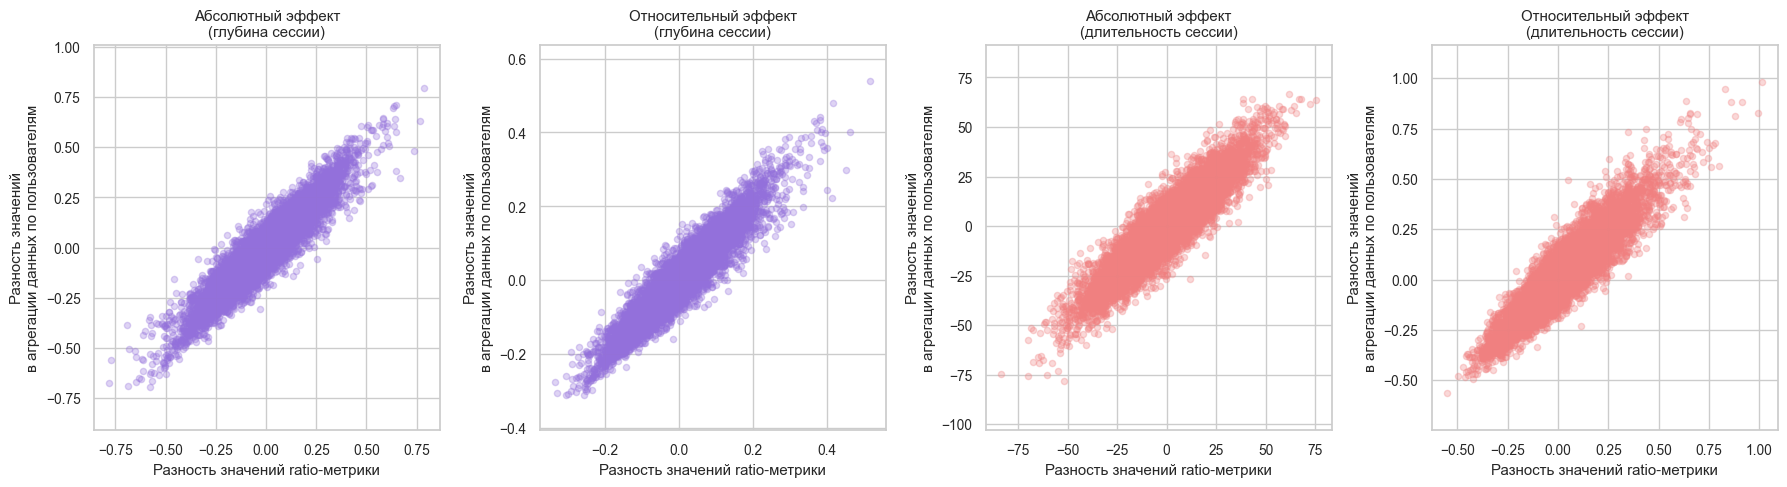

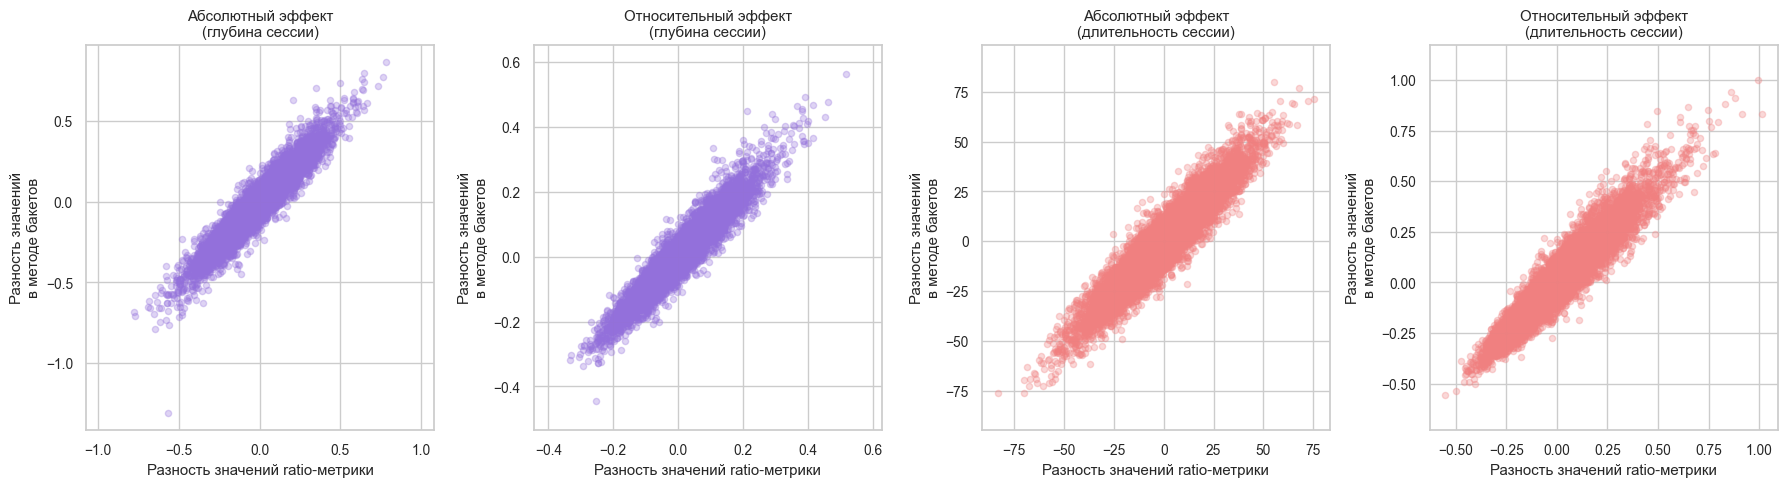

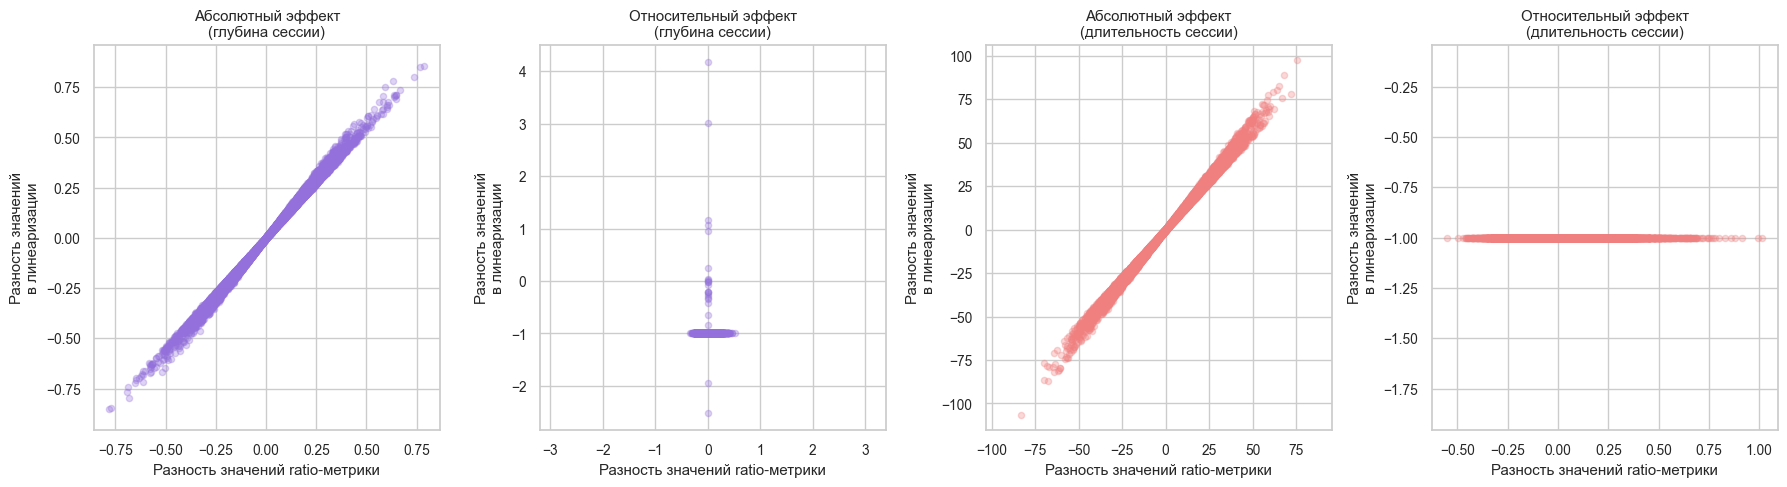

In [20]:
interval_length = 7*5
values_absolute, values_relative = metric_sampler(
    df,
    interval_length,
    n_iter,
    ten_percent,
    num_buckets,
    proportion=0.1
)
plot_values(values_absolute, values_relative)

*Похоже на случай 1, но разброс у нуля в методах аггрегации по пользователям и бакетов меньше, и выбросы в отн. эффекте для линеаризации слабее.*

*5 недель, 20% юзеров*

100%|██████████| 10000/10000 [12:10<00:00, 13.68it/s]


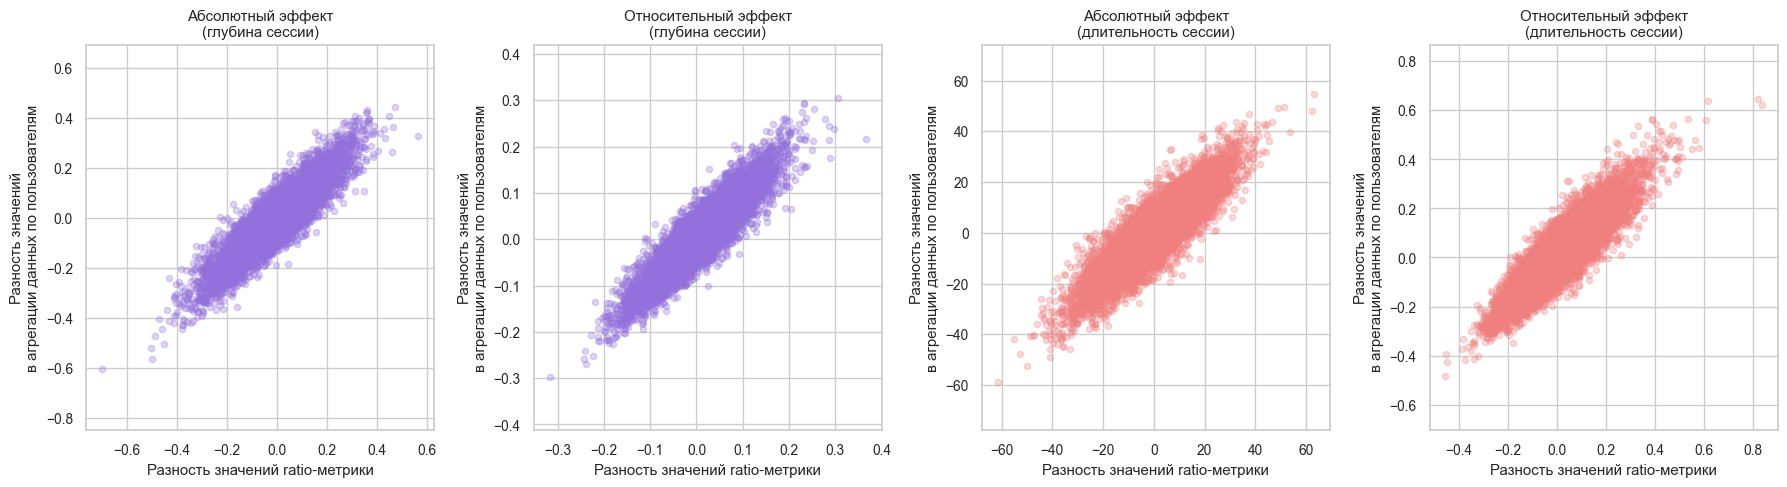

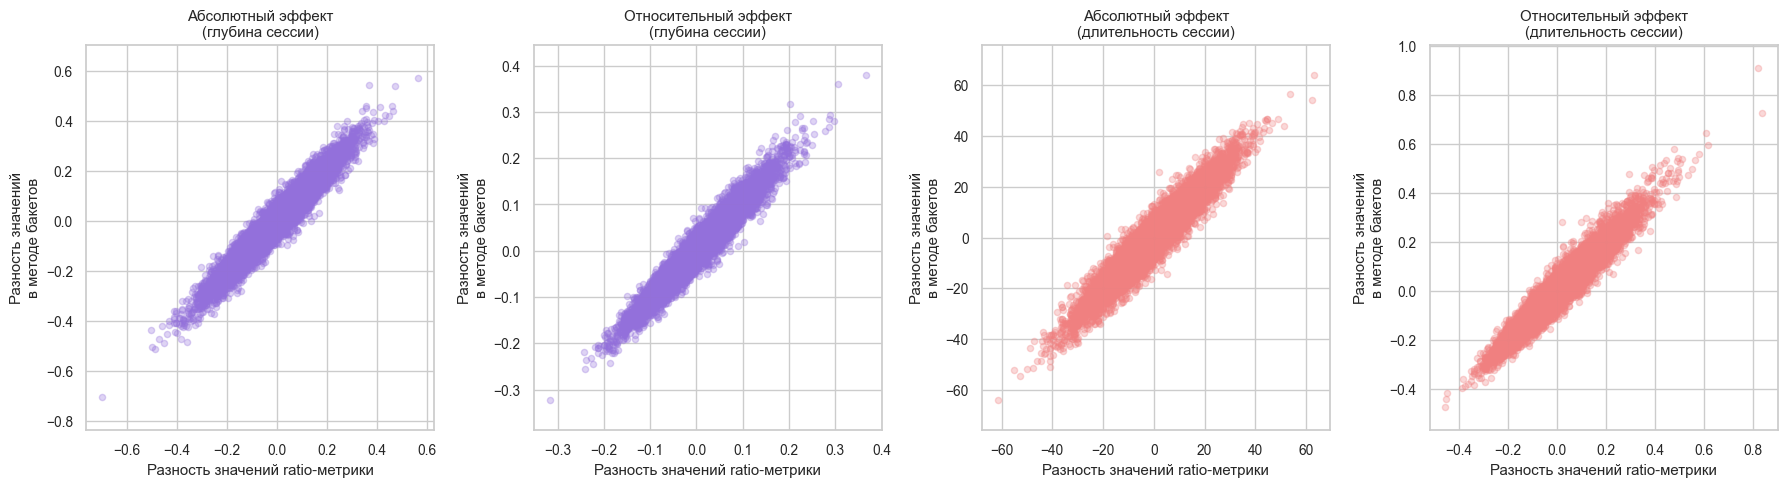

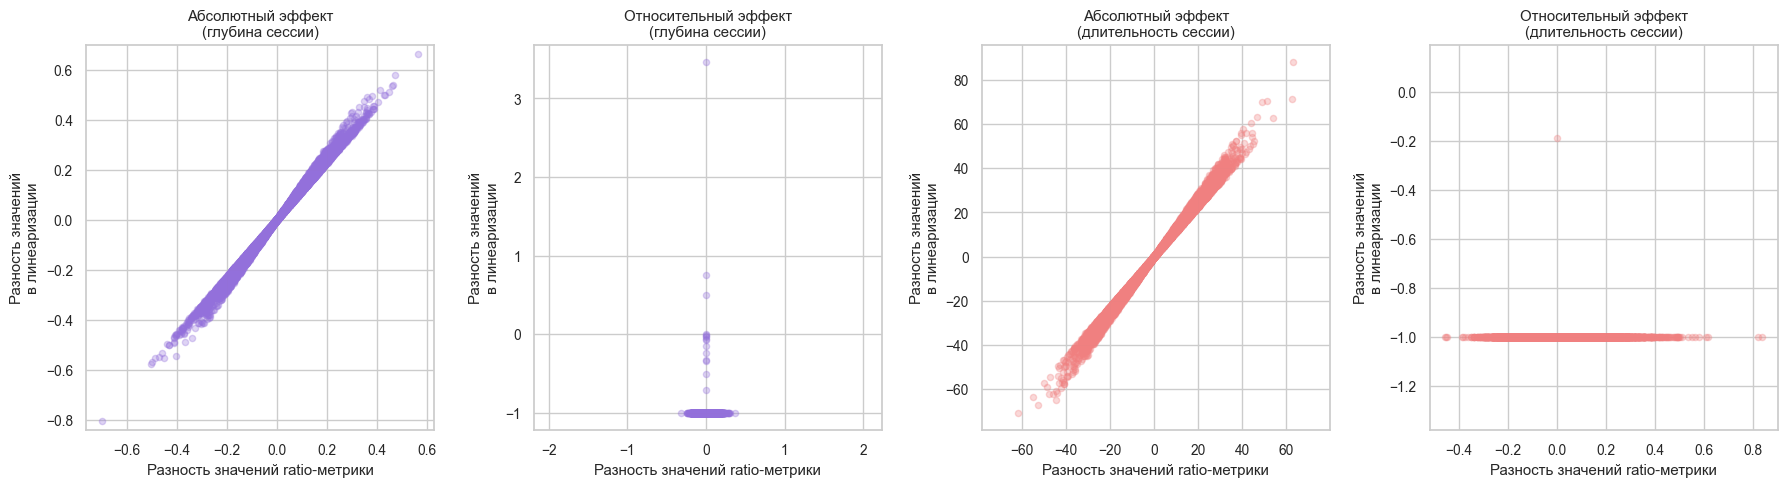

In [21]:
interval_length = 7*5
values_absolute, values_relative = metric_sampler(
    df,
    interval_length,
    n_iter,
    ten_percent,
    num_buckets,
    proportion=0.2
)
plot_values(values_absolute, values_relative)

*Метод бакетов лучше аггрегации по юзерам, линеаризация лучше других методов*  

**2.** Провалидируй эксперимент из предыдущих домашек для линеаризации с CUPED и стратификацией.

По сути, сделать надо примерно то же самое, но добавить линеаризацию. Бери код линеаризации с занятия, а также реализацию теста с линеаризацией и CUPED. А также, может быть, код из предыдущих домашек. В общем, из нескольких реализаций надо сделать одну общую.

In [22]:
def calculate_strata_weights(df, strata_name='strata'):
    '''
    Вычисляет веса страт.
    
    :param df: исходные данные
    :param strata_name: имя колонки со стратами
    :return: веса страт
    '''
    
    strata_weights = df.groupby(by=strata_name)['pilot'].count()
    strata_weights = strata_weights / strata_weights.sum()
    return strata_weights

df_april = df[(df['date'] >= '2022-04-01') & (df['date'] <= '2022-04-28')]
df_march = df[(df['date'] >= '2022-03-01') & (df['date'] <= '2022-03-28')]
df_april_groupped = df_april.groupby(by='ym:s:clientID')
df_march_groupped = df_march.groupby(by='ym:s:clientID')

df_to_test = pd.DataFrame()

# Выборки по периодам
df_to_test['pilot'] = df_april_groupped['ym:s:pageViews'].mean()
df_to_test['prepilot'] = df_march_groupped['ym:s:pageViews'].mean()

# Для пользователя оставляем браузер, который он использовал чаще
most_popular = lambda x: x.mode().iloc[0]
df_to_test['browser'] = df_april_groupped['ym:s:browser'].agg(most_popular)

browsers_usage = df_to_test.groupby(by='browser').count().iloc[:, 0].sort_values(ascending=False)[:8]
df_to_test = df_to_test[df_to_test['browser'].isin(browsers_usage.index)]

df_to_test['march_active'] = list(df_to_test['prepilot'].isna().astype(int))
df_to_test['prepilot'] = df_to_test['prepilot'].fillna(0)

df_to_test['strata'] = df_to_test['browser'] + '_' + df_to_test['march_active'].astype(str)

strata_weights = calculate_strata_weights(df_to_test)

def add_strata(month_df):
    '''Добавляет колонку страты в датафрейм'''
    strata = []
    for user in month_df["ym:s:clientID"]:
        if user in df_to_test["strata"]:
            strata.append(df_to_test["strata"][user])
        else:
            drop_index = month_df[month_df['ym:s:clientID'] == user].index
            month_df = month_df.drop(drop_index)
    month_df["strata"] = strata


add_strata(df_april)
add_strata(df_march)

In [29]:
def calculate_real_alpha(n_errors, n_iter):
    '''
    Оценка реального уровня значимости и его дов. интервала.
    
    Аргументы:
    n_errors -- количество ошибок в эксперименте
    n_iter -- количество экспериментов
    
    Возвращает:
    real_alpha -- оценка реального уровня значимости
    left_alpha, right_alpha -- границы соотв. дов. интервала
    '''
    
    real_alpha = n_errors / n_iter
    left_alpha, right_alpha = proportion_confint(n_errors, n_iter, method='wilson')
    
    return real_alpha, left_alpha, right_alpha


def draw_interval(real_alpha, left_alpha, right_alpha, alpha=0.05, figsize=(7,2)):
    '''
    Отрисовка интервала для реального уровня значимости
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    alpha -- теоретический уровень значимости
    figsize -- размер фигуры matplotlib
    '''
    
    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(6, 2))
        plt.hlines(0, 0, 1, color='black', lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.fill_between(
            [left_alpha, right_alpha], [0.15]*2, [-0.15]*2, 
            color='green', alpha=0.6
        )
        plt.scatter(real_alpha, 0, s=300, marker='*', color='red')
        plt.xlim((min(alpha, left_alpha)-1e-3, max(alpha, right_alpha)+1e-3))
        plt.title(
            f'Доля отвержений = {100*real_alpha:.2f}%, '
            f'интервал ({100*left_alpha:.2f}%, {100*right_alpha:.2f}%)'
        )
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()


def generate_session_sample_double(n_users=1000, mean_session_count=15, effect=0):
    '''
    Генерация данных пользовательских сессий для двух последовательных периодов.
    
    n_users -- количество пользователей
    mean_session_count -- среднее количество сессий на пользователя
    effect -- добавляемый эффект
    '''
    
    # Параметр формы гамма-распределения для каждого пользователя
    user_parameters = np.random.uniform(size=n_users, low=1, high=20)
    
    # Количество сессий каждого пользователя.
    # Генерируем в два раза больше, чтобы хватило на два периода.
    user_session_counts = 2 + np.random.poisson(
        size=n_users, lam=2*mean_session_count
    )
    
    users = []
    period = []
    session_lengths = []
    
    # Для каждого пользователя генерируем все его сессии
    for user_id in range(n_users):
        users += [f'id_{user_id}'] * user_session_counts[user_id]
        session_lengths += list(np.random.gamma(
            shape=user_parameters[user_id], 
            size=user_session_counts[user_id]
        ) + effect)
        
        # В предположении, что все сессии равномерно распределены во времени,
        # количество сессий в каждом периоде имеет биномиальное распределение 
        # с параметрами n=кол-во сессий и p=1/2.
        count = np.random.binomial(n=user_session_counts[user_id], p=0.5)
        
        # Исключаем случаи, когда в одном из периодов нет сессий
        count = min(max(1, count), user_session_counts[user_id]-1)
        
        # Определяем периоды
        period += [1] * count 
        period += [0] * (user_session_counts[user_id] - count)
        
    # Заносим в табличку
    df = pd.DataFrame({
        'user_id': users,
        'session_lengths': np.array(session_lengths, dtype=float),
        'period': np.array(period, dtype=str)
    })
        
    return df


def bucket_transform_with_periods(
    df, numerator_name, num_buckets, user_name='user_id', 
    denominator_name=None, 
):
    '''
    Создает бакеты из данных.
    
    df -- таблица данных
    numerator_name -- имя колонки-числителя ratio-метрики
    user_name -- имя колонки с id пользователей
    denominator_name -- имя колонки-знаменателя ratio-метрики
    num_buckets -- число бакетов
    
    Возвращает сгруппированные данные
    '''
    
    if denominator_name is None:
        denominator_name = 'ratio_denominator'
        df[denominator_name] = 1

    # bucketize
    df['bucket'] = df[user_name].apply(lambda x: np.abs(hash(x)) % num_buckets)
    groupped_df = df.groupby(by=['bucket', 'period'])[[numerator_name, denominator_name]].sum()

    # create ratio-metric column
    groupped_df['values'] = groupped_df[numerator_name] / groupped_df[denominator_name]

    # keep only values
    groupped_df = groupped_df.drop(columns=[numerator_name, denominator_name])

    # join bucket df over periods into a single row
    groupped_df = groupped_df.unstack("period")
    groupped_df.columns = ['_'.join(col).strip() for col in groupped_df.columns.values]

    return groupped_df


def cuped_transform(
    x_df, y_df, 
    sample_name='pilot', cuped_name='cuped', covariate_name='prepilot', 
    paired=False, return_theta=False
):
    '''
    Выполняет CUPED-преобразование.
    
    :param x_df: данные тестовой группы
    :param y_df: данные контрольной группы
    :param sample_name: имя столбца с целевым признаком
    :param cuped_name: имя столбца, в который записать преобразование
    :param covariate_name: имя столбца-ковариаты
    :param paired: являются ли выборки парными
    :param return_theta: возвращать ли значение theta
    :return: таблицы с добавленными столбцами и theta
    '''
    
    # Случай парных выборок
    if paired:
        theta = (
            np.cov(
                x_df[covariate_name]-y_df[covariate_name], 
                x_df[sample_name]-y_df[sample_name]
            )[0, 1]
        ) / (
            (x_df[covariate_name] - y_df[covariate_name]).var(ddof=0)
        )

    # Случай независимых выборок
    else:
        theta = (
            np.cov(x_df[covariate_name], x_df[sample_name])[0, 1] \
            + np.cov(y_df[covariate_name], y_df[sample_name])[0, 1]
        ) / (
            x_df[covariate_name].var(ddof=0) + y_df[covariate_name].var(ddof=0)
        )
    
    # Делаем преобразование
    x_df[cuped_name] = x_df[sample_name] - theta*x_df[covariate_name]
    y_df[cuped_name] = y_df[sample_name] - theta*y_df[covariate_name]
    
    if return_theta:
        return x_df, y_df, theta
    else:
        return x_df, y_df
    

def cuped_bucket_ratio_ttest(
    x_df, y_df, 
    numerator_name='session_lengths', 
    denominator_name=None, 
    user_name='user_id',
    alpha=0.05
):
    '''
    Реализация t-test для ratio-метрик с использованием линеаризации и CUPED.
    В качестве ковариаты используется значение линеаризованной метрики на предпериоде.
    
    Аргументы:
    x_df, y_df -- таблицы данных для двух групп
    cuped -- применять ли CUPED-преобразование
    numerator_name -- имя колонки-числителя ratio-метрики
    denominator_name -- имя колонки-знаменателя ratio-метрики
    user_name -- имя колонки с id пользователей
    alpha -- уровень значимости
    
    Возвращает:
    stat -- статистика критерия
    pvalue -- соответствующее p-value
    '''
    
    # Сделаем cuped-преобразование
    # x and y are independent, so cuped is not paired
    x_df, y_df = cuped_transform(
        x_df, y_df, 
        sample_name='values_1', 
        cuped_name='values_cuped', 
        covariate_name='values_0', 
    )

    return sps.ttest_ind(x_df['values_cuped'], y_df['values_cuped'])


def AA_test(
    test, generate_sample_x, 
    n_iter=10000, sample_size=1000, bucket_size=10, alpha=0.05, 
    effect=0, relative_effect=True, feature_values='session_lengths'
):    
    '''
    Проведение серии AA-тестов на искусственных выборках.
    
    Аргументы:
    test -- статистический критерий
    generate_sample_x -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    alpha -- теоретический уровень значимости
    effect -- величина эффекта для оценки мощности
    relative_effect -- относительный или абсолютный эффект
    feature_values -- название признака, для которого проводится тест
    '''

    n_errors = 0  # количество отвержений H_0

    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):
        # Генерируем выборки
        x = generate_sample_x(size=sample_size)
        y = generate_sample_x(size=sample_size)
        
        # Добавляем эффект, если хотим оценить мощность
        if relative_effect:
            x[feature_values] *= 1 + effect * (x['period'] == 1)
        else:
            x[feature_values] += effect * (x['period'] == 1)

        x = bucket_transform_with_periods(x, feature_values, bucket_size)
        y = bucket_transform_with_periods(y, feature_values, bucket_size)
        
        n_errors += test(x, y)

    # Реальный уровень значимости
    real_alpha, left_alpha, right_alpha = calculate_real_alpha(n_errors, n_iter)
    draw_interval(real_alpha, left_alpha, right_alpha, alpha=alpha)
    
def weighted_mean(df, weights, feature_name='pilot', strata_name='strata'):
    '''
    Вычисляет взвешенное среднее.
    
    :param df: данные
    :param weights: веса страт
    :param feature_name: имя колонки с целевой величиной
    :param strata_name: имя колонки со стратами
    :return: взвешенное среднее
    '''
    
    strata_means = df.groupby(by=strata_name)[feature_name].mean()
    return (strata_means * weights).sum()


def simple_mean(df, weights, feature_name='pilot', strata_name='strata'):
    return df[feature_name].mean()


def weighted_var(df, strata_weights, feature_name='pilot', strata_name='strata'):
    '''
    Вычисляет взвешенную дисперсию при стратификации.
    
    :param df: данные
    :param strata_weights: веса страт
    :param feature_name: имя колонки с целевой величиной
    :param strata_name: имя колонки со стратами
    :return: дисперсия
    '''
    
    strata_vars = df.groupby(by=strata_name)[feature_name].var(ddof=0)
    return (strata_vars * strata_weights).sum() / len(df)


def simple_var(df, strata_weights, feature_name='pilot', strata_name='strata'):
    return df[feature_name].var(ddof=0) / len(df)


def weighted_cov(df, strata_weights, feature_names=['prepilot', 'pilot'], strata_name='strata'):
    '''
    Вычисляет взвешенную дисперсию при стратификации.
    
    :param df: данные
    :param strata_weights: веса страт
    :param feature_names: имена двух колонок, между которыми надо посчитать ковариацию
    :param strata_name: имя колонки со стратами
    :return: дисперсия
    '''
    
    # У результата мультииндекс - страта и имена feature_names
    covs = df.groupby(by=strata_name)[feature_names].cov(ddof=0)
    
    # Оставим в индексе только страту
    covs = covs.reset_index().set_index(strata_name)
    
    # Возьмем антидиагональные элементы для каждой страты, это и будут ковариации
    strata_covs = covs[covs['level_1'] == feature_names[0]][feature_names[1]]
    
    return (strata_covs * strata_weights).sum() / len(df)


def simple_cov(df, strata_weights, feature_names=['prepilot', 'pilot'], strata_name='strata'):
    return np.cov(df[feature_names[0]], df[feature_names[1]])[0, 1] / len(df)


def random_sampler(df, sample_size):
    '''
    Случайное семплирование двух групп одного размера из данных.
    
    :param df: исходные данные
    :param sample_size: размер группы
    :return: две группы данных
    '''
    
    choiced = df.sample(n=2 * sample_size)
    return choiced.iloc[:sample_size], choiced.iloc[sample_size:]


def stratified_sampler(df, sample_size):
    '''
    Стратифицированное семплирование выборок.
    
    :param df: данные
    :param sample_size: размер выборки
    :return: две выборки
    '''
    
    groupped = df.groupby(by='strata')

    # Веса страт
    strata_weights = groupped['pilot'].count()
    strata_weights = strata_weights / strata_weights.sum()
    
    # Размер выборок
    strata_sample_size = np.floor(sample_size * strata_weights + 0.5).astype(int)

    a_group, b_group = [], []
    # Генерируем для каждой страты отдельно
    for i, strata in enumerate(groupped):
        a, b = random_sampler(strata[1], strata_sample_size[i])
        a_group.append(a)
        b_group.append(b)

    return pd.concat(a_group), pd.concat(b_group)


def stratified_ttest(
    x_df, y_df, strata_weights, 
    feature_name='pilot', method='random', alpha=0.05
):
    '''
    Стратифицированный абсолютный t-test.
    
    :param x_df: выборка вместе с информацией о стратах
    :param y_df: выборка вместе с информацией о стратах
    :param strata_weights: веса страт
    :param method: метод 'random', 'stratified'
    :param alpha: уровень значимости
    :return: статистика критерия, границы доверительного интервала, p-value
    '''
    
    if method == 'random':
        mean_function = simple_mean
        var_function = simple_var
    elif method == 'stratified':
        mean_function = weighted_mean
        var_function = weighted_var
        
    x_mean = mean_function(x_df, strata_weights, feature_name=feature_name)
    y_mean = mean_function(y_df, strata_weights, feature_name=feature_name)
    x_var  =  var_function(x_df, strata_weights, feature_name=feature_name)
    y_var  =  var_function(y_df, strata_weights, feature_name=feature_name)
    
    stat = x_mean - y_mean
    std = np.sqrt(x_var + y_var)
    
    t_stat = stat / std
    pvalue = 2*sps.norm.sf(np.abs(t_stat))
    
    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q*std
    right_bound = stat + q*std
    
    return stat, left_bound, right_bound, pvalue


def cuped_strat_transform(
    x_df, y_df, 
    target_name='pilot', covariate_name='prepilot', cuped_name='cuped', 
    strata_name=None, strata_weights=None, return_theta=False
):
    '''
    Выполняет CUPED-преобразование со стратификацией.
    
    :param x_df: данные тестовой группы
    :param y_df: данные контрольной группы
    :param target_name: имя столбца с целевым признаком
    :param covariate_name: имя столбца-ковариаты
    :param cuped_name: имя столбца, в который записать преобразование
    :param strata_name: имя колонки со стратами
    :param strata_weights: веса страт
    :return: таблицы с добавленными столбцами и theta
    '''
    
    var = weighted_var
    cov = weighted_cov
    
    theta = (
        cov(
            x_df, strata_weights, 
            strata_name=strata_name, 
            feature_names=[target_name, covariate_name]
        ) + cov(
            y_df, strata_weights, 
            strata_name=strata_name, 
            feature_names=[target_name, covariate_name]
        )
    ) / (
        var(
            x_df, strata_weights, 
            strata_name=strata_name, 
            feature_name=covariate_name
        ) + var(
            y_df, strata_weights, 
            strata_name=strata_name, 
            feature_name=covariate_name
        )
    )
    
    x_df[cuped_name] = x_df[target_name] - theta*x_df[covariate_name]
    y_df[cuped_name] = y_df[target_name] - theta*y_df[covariate_name]
    
    if return_theta:
        return x_df, y_df, theta
    else:
        return x_df, y_df


def AA_test(
    test, df, 
    n_iter=10000, sample_size=1000, effect=0, relative_effect=True, alpha=0.05
):
    '''
    Проведение серии AA-тестов на искусственных выборках.
    
    Аргументы:
    test -- статистический критерий
    n_iter -- количество итераций
    sample_size -- размер выборок
    effect -- размер добавляемого эффекта (для оценки мощности)
    relative_effect -- является ли эффект относительным или абсолютным
    alpha -- теоретический уровень значимости
    '''
    
    strata_weights = calculate_strata_weights(df)

    n_errors = 0  # количество отвержений H_0

    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):
        # Генерируем выборки
        x_df, y_df = stratified_sampler(df, sample_size=sample_size)
        
        # Добавляем эффект, если хотим оценить мощность
        if relative_effect:
            x_df['pilot'] *= 1 + effect
        else:
            x_df['pilot'] += effect
        
        # Применяем критерий
        n_errors += test(x_df, y_df, strata_weights)

    # Реальный уровень значимости
    real_alpha, left_alpha, right_alpha = calculate_real_alpha(n_errors, n_iter)
    draw_interval(real_alpha, left_alpha, right_alpha, alpha=alpha)
    
    return real_alpha, left_alpha, right_alpha

def linearization(x_df, y_df, month_df, numerator_name, eta=0):
    '''
    Реализация линеаризации ratio-метрики.
    
    Аргументы:
    x_df, y_df -- таблицы данных для двух групп
    numerator_name -- имя колонки-числителя ratio-метрики
    eta -- параметр линеаризации
    
    Возвращает:
    x_users, y_users -- таблицу с поюзерными линеаризованными метриками,
    которые записаны в колонках linearization_values
    '''
    x_df_index = x_df.index
    y_df_index = y_df.index
    
    x_df = month_df[month_df["ym:s:clientID"].isin(x_df_index)]
    y_df = month_df[month_df["ym:s:clientID"].isin(y_df_index)]
    
    denominator_name = 'ratio_denominator'
    x_df[denominator_name] = 1
    y_df[denominator_name] = 1
        
    kappa = (1-eta) * ratio_metric(x_df, numerator_name) \
        + eta * ratio_metric(y_df, numerator_name)
    
    x_users = x_df.groupby("ym:s:clientID").sum()
    y_users = y_df.groupby("ym:s:clientID").sum()
    
    x_users['linearization_values'] = x_users[numerator_name] \
        - kappa * x_users[denominator_name]
    y_users['linearization_values'] = y_users[numerator_name] \
        - kappa * y_users[denominator_name]

    return x_users, y_users

def stratified_linearized_cuped_ttest(
    x_df, y_df, 
    strata_weights, strata_name='strata',
    method='stratified', feature_name='pilot',
    sample_name='pilot', cuped_name='cuped', covariate_name='prepilot',  
    alpha=0.05, eta=0
):
    '''
    Реализация t-test с использованием CUPED, линеаризацией и стратификацией.
    
    Аргументы:
    x_df, y_df -- данные по двум группам
    alpha -- уровень значимости
    :param strata_weights: веса страт
    :param strata_name: имя колонки со стратами
    :param method: метод 'random', 'stratified'
    :param sample_name: имя столбца с целевым признаком
    :param cuped_name: имя столбца, в который записать преобразование
    :param covariate_name: имя столбца-ковариаты
    :param eta: параметр линеаризации

    Возвращает:
    stat -- статистика критерия
    left_bound, right_bound -- границы дов. интервала
    pvalue
    '''

    assert len(x_df) == len(y_df)
    
    x_df = x_df.copy()
    y_df = y_df.copy()

    # Линеаризация на экспериментальном периоде
    x_users_pilot, y_users_pilot = linearization(
        pd.DataFrame(x_df["pilot"]), 
        pd.DataFrame(y_df["pilot"]),
        df_april,
        numerator_name="ym:s:pageViews", 
        eta=eta
    )

    # Линеаризация на предэкспериментальном периоде
    x_users_prepilot, y_users_prepilot = linearization(
        pd.DataFrame(x_df["prepilot"]), 
        pd.DataFrame(y_df["prepilot"]), 
        df_march,
        numerator_name="ym:s:pageViews", 
        eta=eta
    )

    # Соединяем две таблицы данных для каждой из групп
    x_users = pd.DataFrame()
    x_users['pilot'] = x_users_pilot['linearization_values']
    x_users['prepilot'] = x_users_prepilot['linearization_values']
    x_users['prepilot'] = x_users['prepilot'].fillna(0)
    x_users['strata'] = [df_to_test["strata"][user] for user in x_users.index]

    y_users = pd.DataFrame()
    y_users['pilot'] = y_users_pilot['linearization_values']
    y_users['prepilot'] = y_users_prepilot['linearization_values']
    y_users['prepilot'] = y_users['prepilot'].fillna(0)
    y_users['strata'] = [df_to_test["strata"][user] for user in y_users.index]

    # Сделаем cuped-преобразование
    x_df, y_df, theta = cuped_strat_transform(
        x_users, y_users, 
        target_name=sample_name, 
        cuped_name=cuped_name, 
        covariate_name=covariate_name,
        strata_name=strata_name,
        strata_weights=strata_weights,
        return_theta=True
    )
    
    # Имя столбца, которое будем использовать
    name = cuped_name
    
    return stratified_ttest(x_df, y_df, strata_weights, feature_name=name, method=method, alpha=alpha)

Сравни критерии по линеаризованной метрике по мощности при использовании CUPED и в простом случае.

In [30]:
sample_size = 1_000
x_df, y_df = stratified_sampler(df_to_test, sample_size=sample_size)

stratified_linearized_cuped_ttest(
    x_df, y_df, 
    strata_weights,
    method='stratified'
)

(-0.3643051813799822,
 -0.9789629960910973,
 0.25035263333113295,
 0.24537251689784356)

100%|██████████| 10000/10000 [09:23<00:00, 17.75it/s]


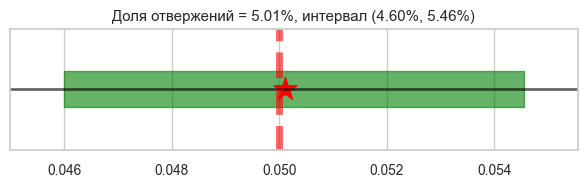

100%|██████████| 10000/10000 [09:28<00:00, 17.60it/s]


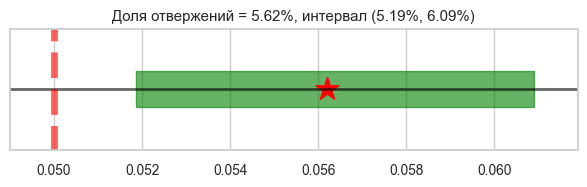

  1%|          | 51/10000 [00:03<10:02, 16.51it/s]


KeyboardInterrupt: 

In [31]:
for e in [0, 0.05, 0.1]:
    AA_test(
        lambda x, y, s: stratified_linearized_cuped_ttest(x, y, s, method='stratified')[3] < alpha, 
        df_to_test,
        effect=e,
        sample_size=sample_size,
        n_iter=n_iter
    )

**Вывод:** *тест корректен, но мощность мала во 2м случае*

Вот и все, задание закончилось, вроде же хорошо мы вместе решили задачки, правда?)

<b><font color="#f09000" size="5">===== Конец исправлений =====</font></b>